# BoomBikes
BoomBikes dataset contains information about past daily bike-sharing usage. The aim is to model the demand for shared bikes with the available independent variables. This would help the management to manipulate their strategy for their demand needs and customer's expectations.

**Problem statement**
- Given historical daily bike‑share data, predict daily total rentals (cnt) and identify which factors drive demand.

**Goal**
- Cleanse the given data set
- Analyse the data using Exploratory Data Analysis (EDA) techniques
- Build a robust model using Linear Regression
- Provide a set of strong influencers for bike rental demand which could benefit the business

## Data Understanding, Preparation and EDA

### Data Understanding
- 'cnt' is the target variable
- There are no missing column data or missing row data or invalid data found at first glance. Missing data is also validated via code in this section.
- aTemp column data might not be so relevant, but can be analysed via EDA hence retaining it.
- Apart from these, some irrelevant columns and quality issues are identified as shown below:

**Data Quality Issues in Loan Dataset**
| Issue        | Description                                   | Columns                    |
|--------------|-----------------------------------------------|----------------------------|
| Unique identifier columns | Some columns are unique identifiers | instant, dteday         |
| Redundant columns | Some columns are redundant | casual, registered                       |
| Categorical columns are integers | Categorical columns are integers which could yield misleading results during EDA | season, yr, mnth, holiday, weekday, workingday, weathersit             |
| Float precision | Some columns have more decimals | temp, atemp, hum, windspeed           |

**Data Categorization**
| Variable Group         | Column Name    | Variable Type           | Description                                   | Used in Analysis? |
|-----------------------|---------------|-------------------------|-----------------------------------------------|-------------------|
| Demand (Target)       | cnt           | Numerical               | Total bike rentals (casual + registered)      | Yes              |
| Date/Time             | dteday        | Date                    | Date of rental record                         | No               |
|                       | instant       | Identifier              | Unique record index                           | No               |
| Calendar              | yr            | Ordered Categorical     | Year (0:2018, 1:2019)                         | Yes              |
|                       | mnth          | Ordered Categorical     | Month (1–12)                                  | Yes              |
|                       | holiday       | Unordered Categorical   | Holiday indicator (0:No, 1:Yes)               | Yes              |
|                       | weekday       | Ordered Categorical     | Day of week (0–6) (0 is Sunday)               | Yes              |
|                       | workingday    | Unordered Categorical   | Working day indicator (0:No, 1:Yes)           | Yes              |
| Weather               | season        | Ordered Categorical     | Season (1:spring, 2:summer, 3:fall, 4:winter) | Yes              |
|                       | weathersit    | Unordered Categorical   | Weather situation (1–4)                       | Yes              |
|                       | temp          | Numerical               | Temperature (Celsius)                         | Yes              |
|                       | atemp         | Numerical               | "feeling" temperature (Celsius)               | Yes              |
|                       | hum           | Numerical               | Humidity                                      | Yes              |
|                       | windspeed     | Numerical               | Windspeed                                     | Yes              |
| Booking Type          | casual        | Numerical               | Count of casual users                         | No               |
|                       | registered    | Numerical               | Count of registered users                     | No               |

#### Import Libraries

In [480]:
# importing necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import RFE
from scipy import stats
import warnings

#### Data Load

In [481]:
# Load data to data frame excluding 'NA' and 'n/a' as missing values
df_bikeshare = pd.read_csv('day.csv', na_values=['NA', 'n/a'])
# Displaying first 10 rows of the dataframe
df_bikeshare.head(10)

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   
5        6  06-01-2018       1   0     1        0        4           1   
6        7  07-01-2018       1   0     1        0        5           1   
7        8  08-01-2018       1   0     1        0        6           0   
8        9  09-01-2018       1   0     1        0        0           0   
9       10  10-01-2018       1   0     1        0        1           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   
5           1   8.378268  11.66045  51.8261   6.000868      88        1518   
6           2   8.057402  10.44195  49.8696  11.304642     148        1362   
7           2   6.765000   8.11270  53.5833  17.875868      68         891   
8           1   5.671653   5.80875  43.4167  24.250650      54         768   
9           1   6.184153   7.54440  48.2917  14.958889      41        1280   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
5  1606  
6  1510  
7   959  
8   822  
9  1321

#### Data Overview

In [482]:
# Checking the shape of the dataframe to understand the number of rows and columns  
df_bikeshare.shape

(730, 16)

In [483]:
df_bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [484]:
df_bikeshare.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [485]:
# Get data types of all columns
df_bikeshare.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [486]:
# There are no columns with NaN values
nan_columns = df_bikeshare.columns[df_bikeshare.isna().all()].tolist()
nan_columns

[]

In [487]:
# There are no columns with missing data
missingColumnValues = df_bikeshare.isnull().sum()
missingColumnValues

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Data Cleaning and Preparation:

- Removed the below unnecessary columns
- Row removal and data aggregation are not required

    | Column Names                        | Reason for Deletion                  |
    |------------------------------------|--------------------------------------|
    | instant, dteday                    | Unique Identifier columns.           |
    | casual, registered                 | Redundant columns since cnt is the sum of these two columns                 |
- Standardise precision for float columns such as temp, atemp, hum, windspeed
- Convert numeric values to strings for Categorical data like season, yr, mnth, holiday, weekday, workingday, weathersit

In [488]:
# Removed unique identifier columns
unique_id_columns = ['instant', 'dteday']
df_bikeshare.drop(columns=unique_id_columns, inplace=True)

In [489]:
# 'casual' and 'registered' adds up to 'cnt' hence dropping those columns
sum_check = (df_bikeshare['casual'] + df_bikeshare['registered'] == df_bikeshare['cnt']).all()
sum_check

np.True_

In [490]:
# Removed casual and registered columns as they sum up to the target variable 'cnt'
redundant_columns = ['casual', 'registered']
df_bikeshare.drop(columns=redundant_columns, inplace=True)

# Displaying the columns of the cleaned dataframe
df_bikeshare.shape

(730, 12)

In [491]:
# Standardise precision for float columns such as temp, atemp, hum, windspeed
df_bikeshare['temp'] = df_bikeshare['temp'].round(2)
df_bikeshare['atemp'] = df_bikeshare['atemp'].round(2)
df_bikeshare['hum'] = df_bikeshare['hum'].round(2)
df_bikeshare['windspeed'] = df_bikeshare['windspeed'].round(2)

df_bikeshare.head()

season  yr  mnth  holiday  weekday  workingday  weathersit   temp  atemp  \
0       1   0     1        0        6           0           2  14.11  18.18   
1       1   0     1        0        0           0           2  14.90  17.69   
2       1   0     1        0        1           1           1   8.05   9.47   
3       1   0     1        0        2           1           1   8.20  10.61   
4       1   0     1        0        3           1           1   9.31  11.46   

     hum  windspeed   cnt  
0  80.58      10.75   985  
1  69.61      16.65   801  
2  43.73      16.64  1349  
3  59.04      10.74  1562  
4  43.70      12.52  1600

In [492]:
# Convert numeric categorical columns to strings with all labels in lower case
season_map = {
    1: 'spring', 
    2: 'summer', 
    3: 'fall', 
    4: 'winter'}
yr_map = {0: '2018', 1: '2019'}
mnth_map = {
    1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul', 
    8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'}
holiday_map = {0: 'no', 1: 'yes'}
weekday_map = {0: 'sun', 1: 'mon', 2: 'tue', 3: 'wed', 4: 'thu', 5: 'fri', 6: 'sat'}
workingday_map = {0: 'no', 1: 'yes'}
weathersit_map = {
    1: 'clear/partly cloudy',
    2: 'misty/cloudy',
    3: 'light snow/rain',
    4: 'heavy rain/snow'
}

df_bikeshare['season'] = df_bikeshare['season'].map(season_map)
df_bikeshare['yr'] = df_bikeshare['yr'].map(yr_map)
df_bikeshare['mnth'] = df_bikeshare['mnth'].map(mnth_map)
df_bikeshare['holiday'] = df_bikeshare['holiday'].map(holiday_map)
df_bikeshare['weekday'] = df_bikeshare['weekday'].map(weekday_map)
df_bikeshare['workingday'] = df_bikeshare['workingday'].map(workingday_map)
df_bikeshare['weathersit'] = df_bikeshare['weathersit'].map(weathersit_map)

In [493]:
# Get the head of the cleaned dataframe
df_bikeshare.head()

season    yr mnth holiday weekday workingday           weathersit   temp  \
0  spring  2018  jan      no     sat         no         misty/cloudy  14.11   
1  spring  2018  jan      no     sun         no         misty/cloudy  14.90   
2  spring  2018  jan      no     mon        yes  clear/partly cloudy   8.05   
3  spring  2018  jan      no     tue        yes  clear/partly cloudy   8.20   
4  spring  2018  jan      no     wed        yes  clear/partly cloudy   9.31   

   atemp    hum  windspeed   cnt  
0  18.18  80.58      10.75   985  
1  17.69  69.61      16.65   801  
2   9.47  43.73      16.64  1349  
3  10.61  59.04      10.74  1562  
4  11.46  43.70      12.52  1600

### Data Analysis: (EDA)

#### Univariate Analysis
- Frequency of users is more during clear or partly cloudy weather.
- Frequency of users is more during working days compared to holidays.
- Almost all seasons and days have users riding bikes.

##### Unordered categorical variables (weathersit, holiday, workingday)

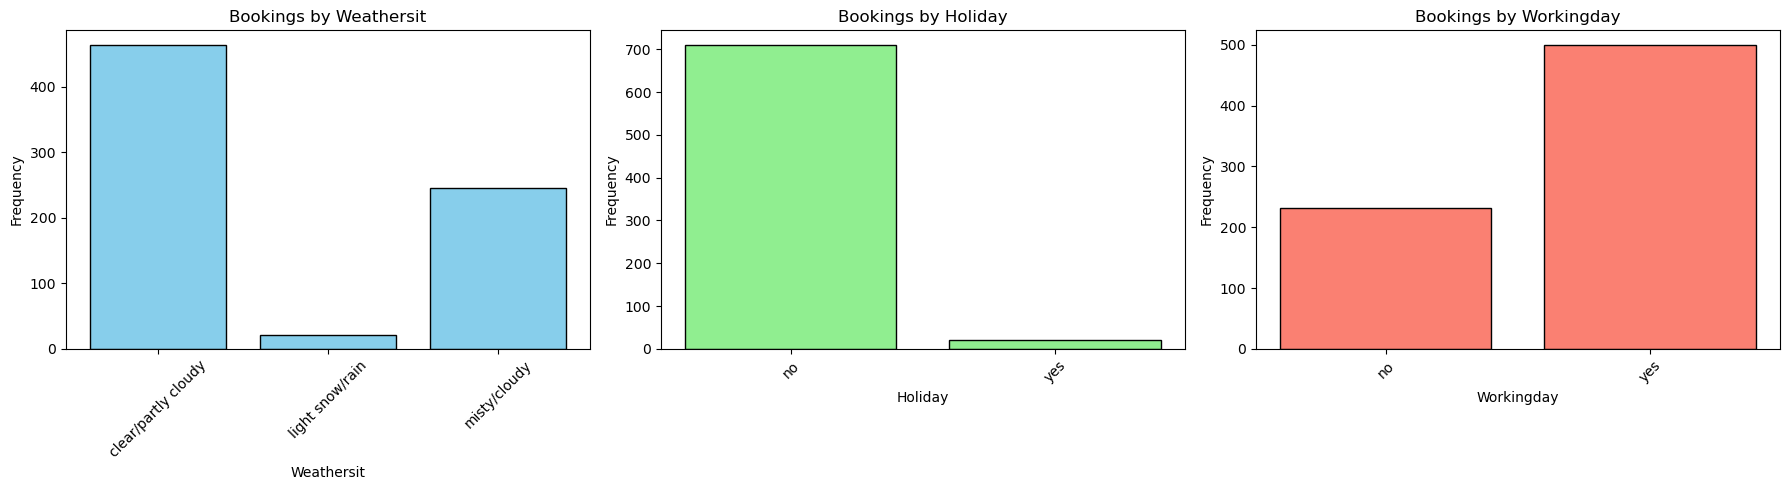

In [494]:
# Unordered categorical variables: weathersit, holiday, workingday
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Weathersit
weathersit_counts = df_bikeshare['weathersit'].value_counts().sort_index()
axs[0].bar(weathersit_counts.index, weathersit_counts.values, color='skyblue', edgecolor='black')
axs[0].set_title('Bookings by Weathersit')
axs[0].set_xlabel('Weathersit')
axs[0].set_ylabel('Frequency')
axs[0].tick_params(axis='x', rotation=45)

# Holiday
holiday_counts = df_bikeshare['holiday'].value_counts().sort_index()
axs[1].bar(holiday_counts.index, holiday_counts.values, color='lightgreen', edgecolor='black')
axs[1].set_title('Bookings by Holiday')
axs[1].set_xlabel('Holiday')
axs[1].set_ylabel('Frequency')
axs[1].tick_params(axis='x', rotation=45)

# Workingday
workingday_counts = df_bikeshare['workingday'].value_counts().sort_index()
axs[2].bar(workingday_counts.index, workingday_counts.values, color='salmon', edgecolor='black')
axs[2].set_title('Bookings by Workingday')
axs[2].set_xlabel('Workingday')
axs[2].set_ylabel('Frequency')
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

##### Ordered categorical variables (season, yr, mnth, weakday)

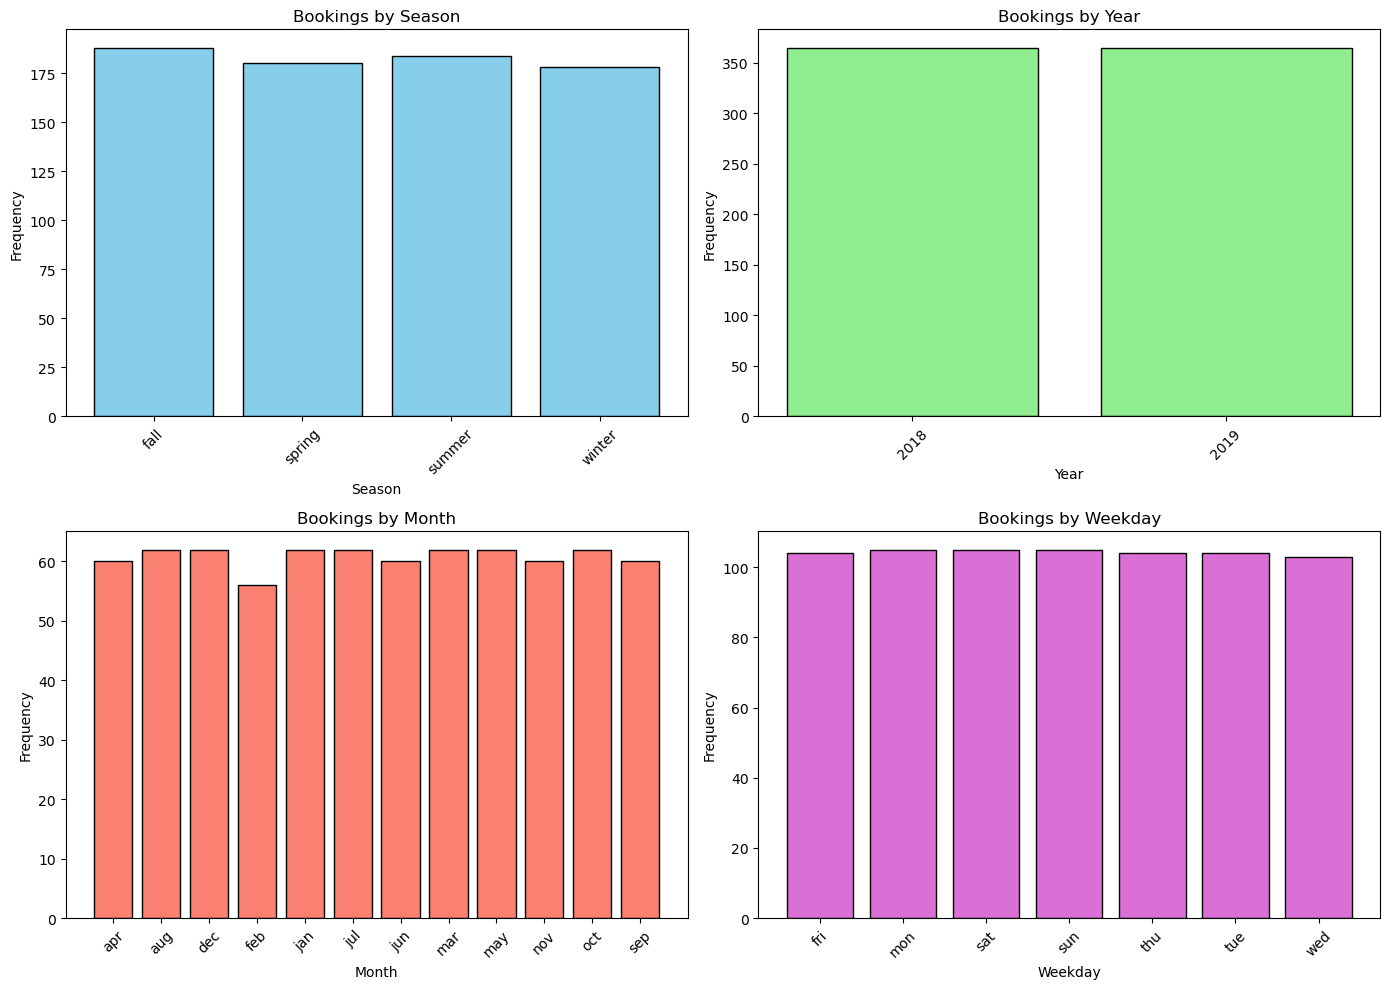

In [495]:
# Ordered categorical variables: season, yr, mnth, weekday
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Season
season_counts = df_bikeshare['season'].value_counts().sort_index()
axs[0, 0].bar(season_counts.index, season_counts.values, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Bookings by Season')
axs[0, 0].set_xlabel('Season')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].tick_params(axis='x', rotation=45)

# Year
yr_counts = df_bikeshare['yr'].value_counts().sort_index()
axs[0, 1].bar(yr_counts.index, yr_counts.values, color='lightgreen', edgecolor='black')
axs[0, 1].set_title('Bookings by Year')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].tick_params(axis='x', rotation=45)

# Month
mnth_counts = df_bikeshare['mnth'].value_counts().sort_index()
axs[1, 0].bar(mnth_counts.index, mnth_counts.values, color='salmon', edgecolor='black')
axs[1, 0].set_title('Bookings by Month')
axs[1, 0].set_xlabel('Month')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].tick_params(axis='x', rotation=45)

# Weekday
weekday_counts = df_bikeshare['weekday'].value_counts().sort_index()
axs[1, 1].bar(weekday_counts.index, weekday_counts.values, color='orchid', edgecolor='black')
axs[1, 1].set_title('Bookings by Weekday')
axs[1, 1].set_xlabel('Weekday')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

##### Numerical variables: (temp, atemp, hum, windspeed, cnt)

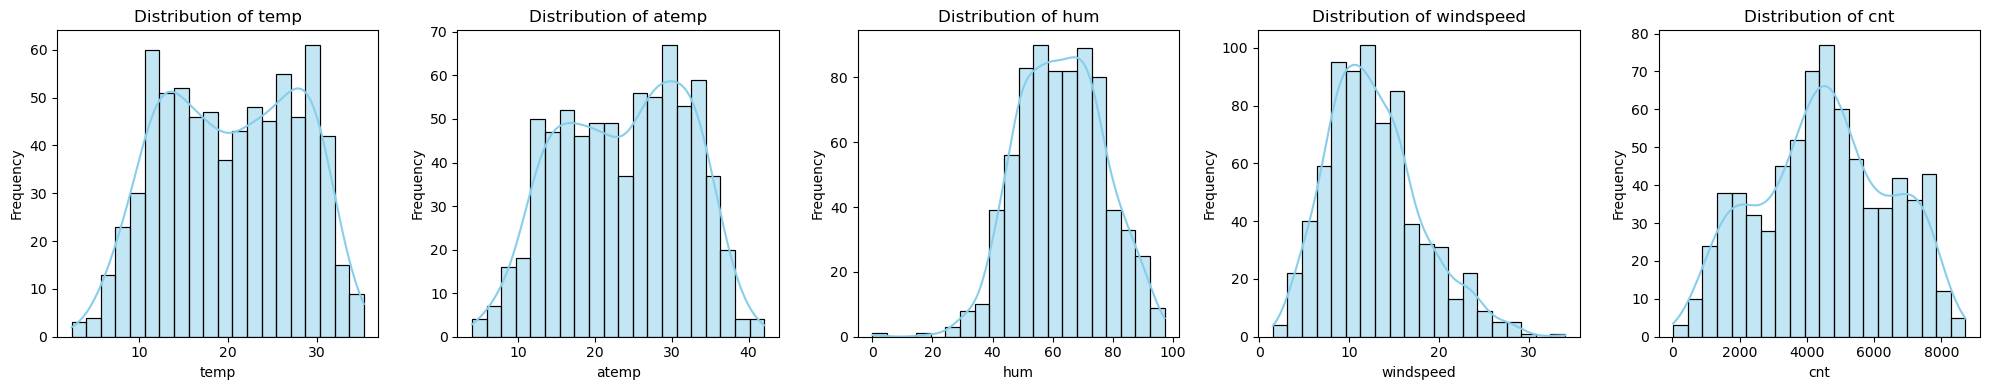

In [496]:
# Plot histograms for numerical variables: temp, atemp, hum, windspeed, cnt
# with KDE (Kernel Density Estimate)
numerical_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
fig, axs = plt.subplots(1, len(numerical_cols), figsize=(20, 4))

for i, col in enumerate(numerical_cols):
    sns.histplot(df_bikeshare[col], bins=20, kde=True, ax=axs[i], color='skyblue', edgecolor='black')
    axs[i].set_title(f'Distribution of {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Bivariate / Multivariate Analysis
- Target variable is cnt (total bike rentals)

##### Correlation Matrix: (temp, atemp, hum, windspeed, cnt)
- atemp and temp are highly correlated so we can remove atemp
- Bike user count (cnt) and temp are highly correlated. So, users prefer biking in good temperatures
- Humidity and windspeed are negatively correlated with total bike users count (cnt)

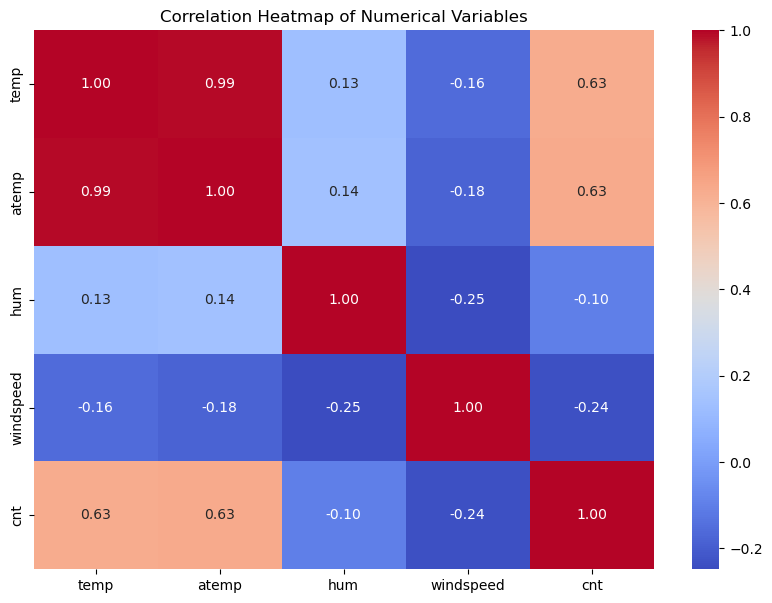

In [497]:
# Heatmap for all numerical variables in BoomBikes dataset
numerical_cols = df_bikeshare.select_dtypes(include=['number']).columns
corr_matrix = df_bikeshare[numerical_cols].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

##### Boxplot for categorical variables against cnt: (season, yr, mnth, workday, holiday, weekday, weathersit)
- Bike users are more in Fall season and when weather is clear or partly cloudy
- No rides when weather is worse (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog)
- Users have increased significantly in 2019 compared to 2018
- Peak months are from April to October
- Bike riders are more on working days
- Riders on Sunday are less

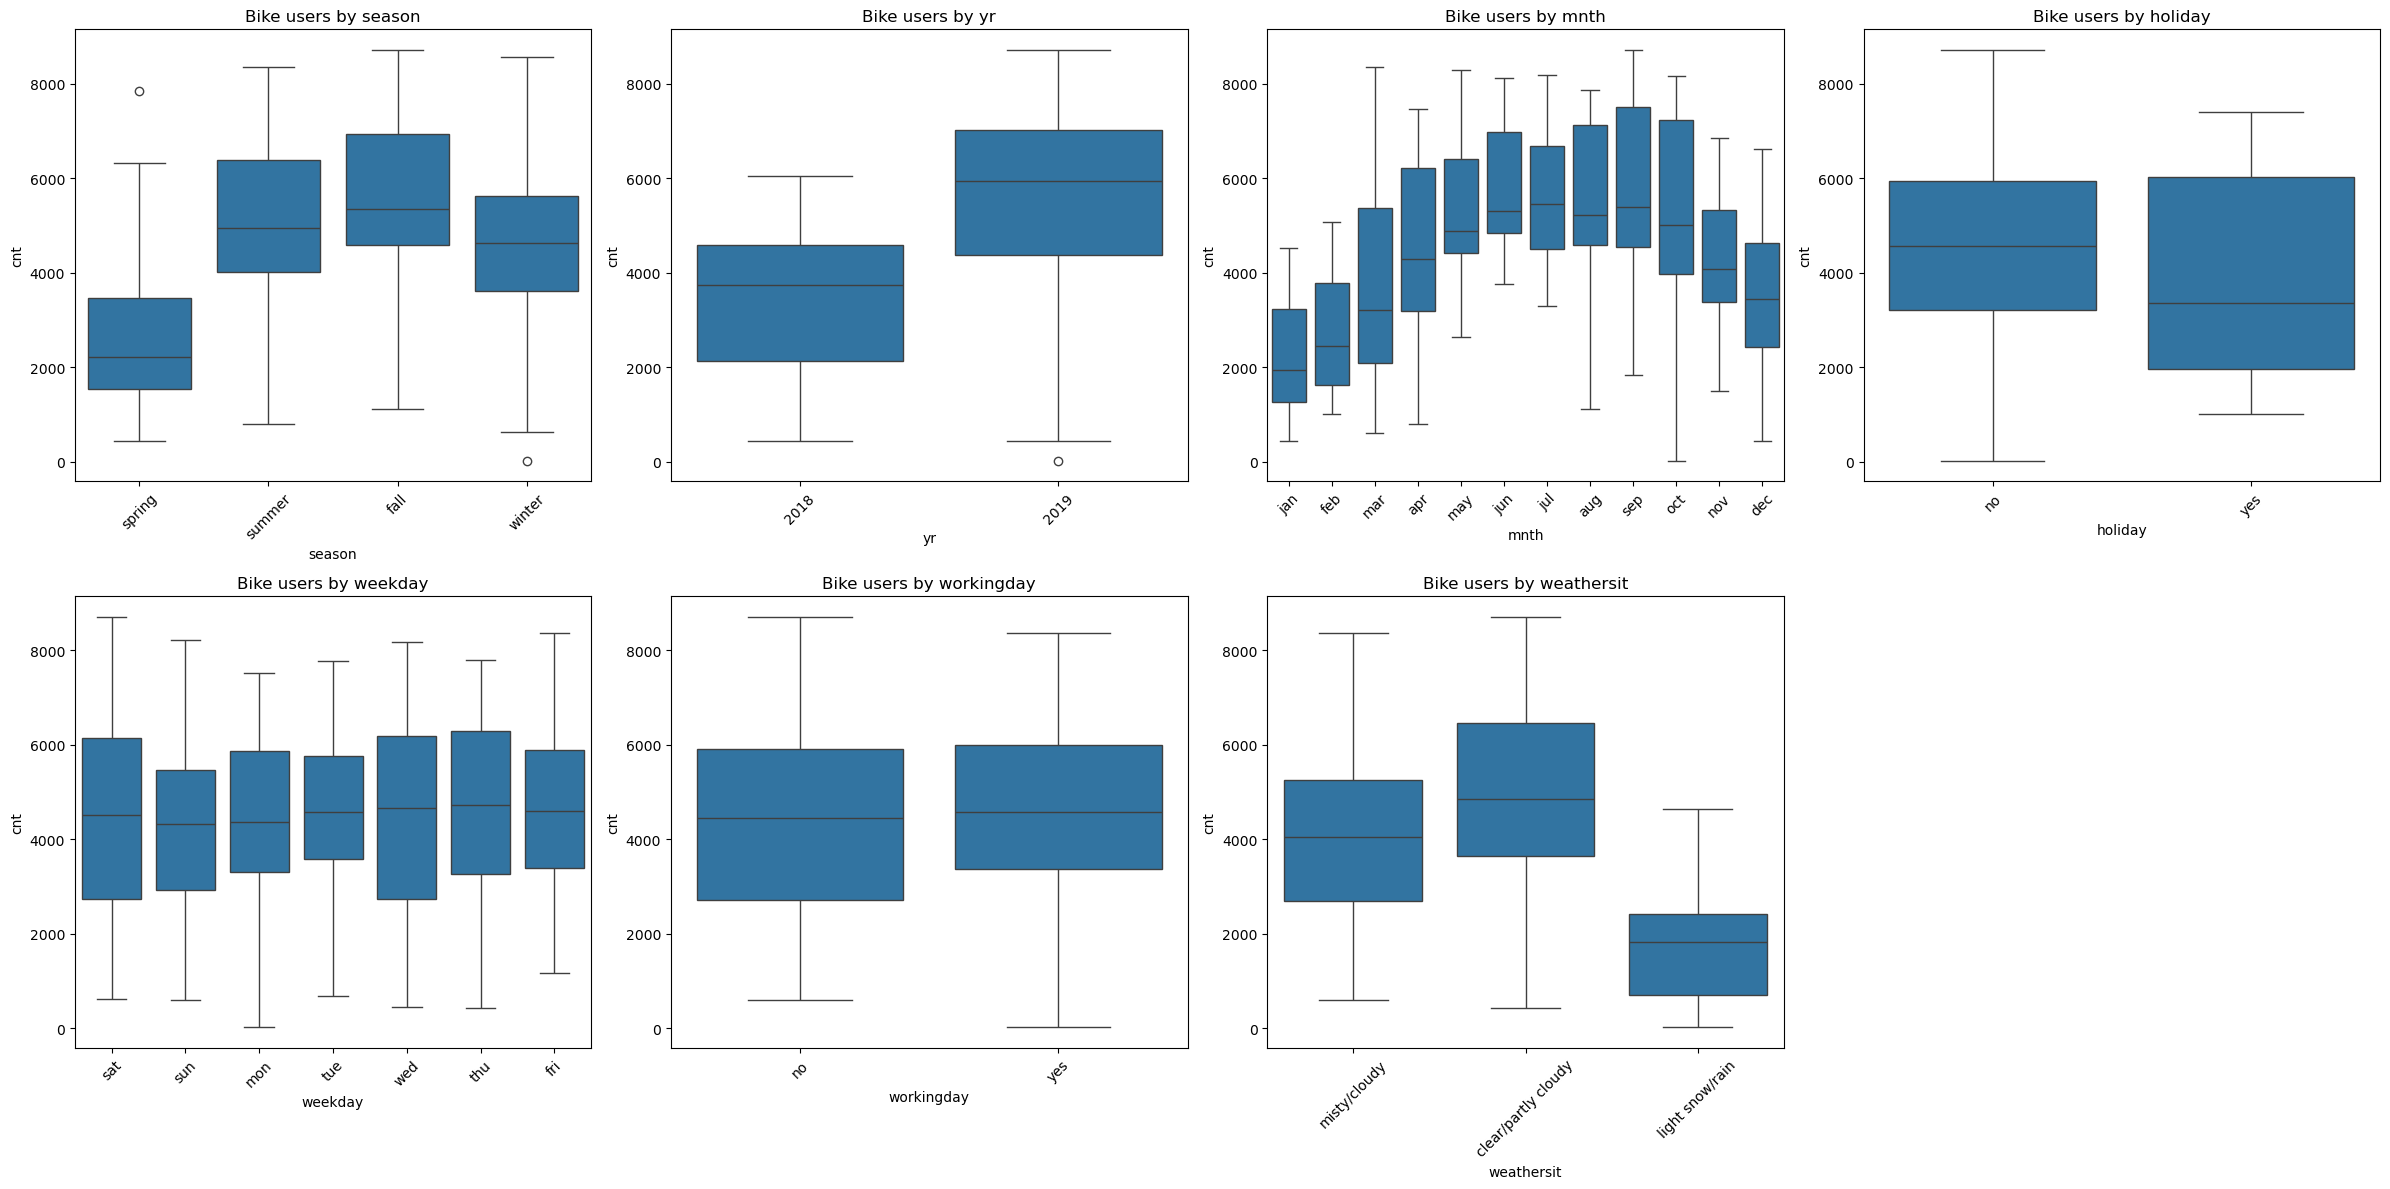

In [498]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

fig, axs = plt.subplots(2, 4, figsize=(24, 12))
axs = axs.flatten()

for i, var in enumerate(categorical_vars):
    sns.boxplot(x=var, y='cnt', data=df_bikeshare, ax=axs[i])
    axs[i].set_title(f'Bike users by {var}')
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('cnt')
    axs[i].tick_params(axis='x', rotation=45)

# Hide unused subplot if any
for j in range(len(categorical_vars), len(axs)):
    axs[j].set_visible(False)

plt.tight_layout()
plt.show()

##### Multivariaant plot for categorical variables against cnt: (season, weathersit, workday, holiday)
- From previous boxplot, there is no significant variation in months or weekdays so we can ignore these for further analysis
- When plotted cnt against weather and season, it is clear that riders are more when weather is clear or partly cloudy. Especially Fall season has more riders.
- Non-holidays have more riders for commute than on holidays.

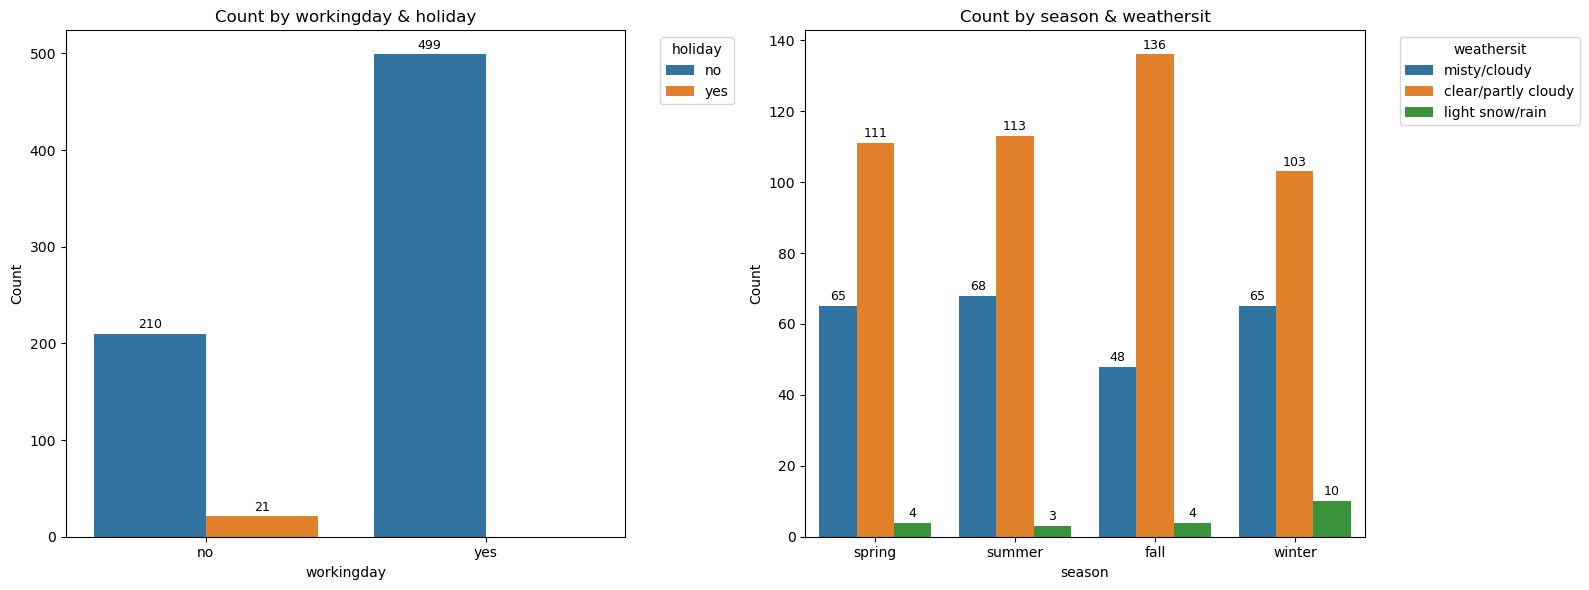

In [499]:
import matplotlib.pyplot as plt
import seaborn as sns

# Only keep selected pairs
selected_pairs = [
    ('workingday', 'holiday'),
    ('season', 'weathersit')
]

n_plots = len(selected_pairs)
fig, axs = plt.subplots(1, n_plots, figsize=(n_plots*8, 6))

for i, (var1, var2) in enumerate(selected_pairs):
    ax = axs[i]
    sns.countplot(x=var1, hue=var2, data=df_bikeshare, ax=ax)
    ax.set_title(f'Count by {var1} & {var2}')
    ax.set_xlabel(var1)
    ax.set_ylabel('Count')
    ax.legend(title=var2, bbox_to_anchor=(1.05, 1), loc='upper left')
    # Add count labels above each bar
    for p in ax.patches:
        height = int(p.get_height())
        if height > 0:
            ax.annotate(f'{height}', 
                        (p.get_x() + p.get_width() / 2., height), 
                        ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 2), textcoords='offset points')

plt.tight_layout()
plt.show()

### EDA Summary: Potential Variables Contributing to Bike Rentals count

Based on EDA, the following variables are identified as key contributors to the total bike rider count:

**Seasonality & Weather:**
-  Bike rentals (cnt) are highest in the fall seasons, and when weather is clear or partly cloudy. Poor weather (heavy rain/snow) leads to very low demand.
- Higher temperatures are associated with higher bike counts.
- As windspeed and humidity increase, bike rentals tend to decrease.
- The distributions of cnt, windspeed, and humidity are right-skewed, indicating most days have moderate values, with fewer extreme days.

**Calendar Effects:**
- Rentals are higher on working days and non-holidays, with Sundays and holidays showing lower counts.
- Peak usage occurs from April to October; weekdays (especially Monday to Friday) have more riders than weekends.
- There is a noticeable increase in bike usage in 2019 compared to 2018. 

### Data Preparation for Linear Regression based on EDA

#### Column removal based on EDA
- atemp and temp are highly correlated so we need to remove atemp since they could cause multicollinearity which could affect regression coefficients.

In [500]:
# Drop 'atemp' column due to high correlation with 'temp'
df_bikeshare.drop(columns=['atemp'], inplace=True)
df_bikeshare.head()

season    yr mnth holiday weekday workingday           weathersit   temp  \
0  spring  2018  jan      no     sat         no         misty/cloudy  14.11   
1  spring  2018  jan      no     sun         no         misty/cloudy  14.90   
2  spring  2018  jan      no     mon        yes  clear/partly cloudy   8.05   
3  spring  2018  jan      no     tue        yes  clear/partly cloudy   8.20   
4  spring  2018  jan      no     wed        yes  clear/partly cloudy   9.31   

     hum  windspeed   cnt  
0  80.58      10.75   985  
1  69.61      16.65   801  
2  43.73      16.64  1349  
3  59.04      10.74  1562  
4  43.70      12.52  1600

#### Dummy vaiable creation

In [501]:
# Create dummy variables for categorical columns (as 0/1 for linear regression)
categorical_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
df_bikeshare_dummies = pd.get_dummies(df_bikeshare, columns=categorical_cols, drop_first=True)

# Convert all boolean columns (True/False) to integers (0/1)
df_bikeshare_dummies = df_bikeshare_dummies.astype(int)

# Display the first few rows of the processed dataframe
df_bikeshare_dummies.head()

temp  hum  windspeed   cnt  season_spring  season_summer  season_winter  \
0    14   80         10   985              1              0              0   
1    14   69         16   801              1              0              0   
2     8   43         16  1349              1              0              0   
3     8   59         10  1562              1              0              0   
4     9   43         12  1600              1              0              0   

   yr_2019  mnth_aug  mnth_dec  ...  holiday_yes  weekday_mon  weekday_sat  \
0        0         0         0  ...            0            0            1   
1        0         0         0  ...            0            0            0   
2        0         0         0  ...            0            1            0   
3        0         0         0  ...            0            0            0   
4        0         0         0  ...            0            0            0   

   weekday_sun  weekday_thu  weekday_tue  weekday_wed  workingday_yes  \
0            0            0            0            0               0   
1            1            0            0            0               0   
2            0            0            0            0               1   
3            0            0            1            0               1   
4            0            0            0            1               1   

   weathersit_light snow/rain  weathersit_misty/cloudy  
0                           0                        1  
1                           0                        1  
2                           0                        0  
3                           0                        0  
4                           0                        0  

[5 rows x 29 columns]

## Model Building and Evaluation
- Simple Linear Regression
- Multiple Linear Regression

### Simple Linear Regression
- Let's build Simple Linear Regression for dependent variable 'cnt' and each independent numerical variable 'temp', 'humidity', 'windspeed' and with each independent binary categorical variable 'holiday', 'workingday'.

#### Simple Linear Regression (cnt Vs temp) - FIT

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     471.7
Date:                Sun, 16 Nov 2025   Prob (F-statistic):           5.06e-81
Time:                        23:48:28   Log-Likelihood:                -6377.9
No. Observations:                 730   AIC:                         1.276e+04
Df Residuals:                     728   BIC:                         1.277e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1222.0599    161.276      7.577      0.0

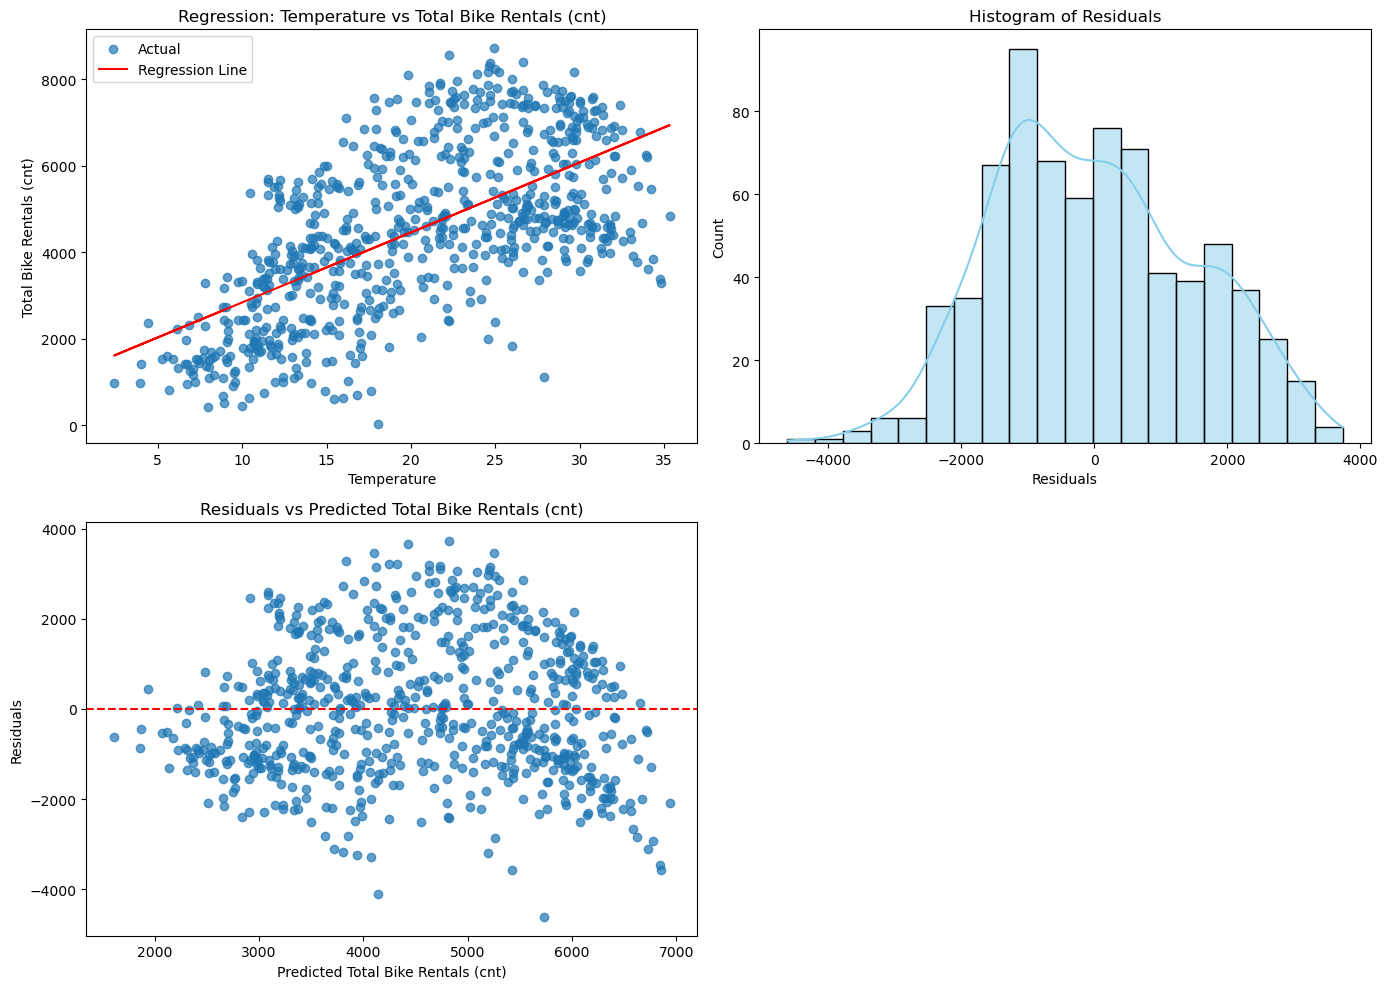

In [502]:
# Simple Linear Regression for temp Vs cnt

# Prepare data
X = df_bikeshare[['temp']]
y = df_bikeshare['cnt']
X_const = sm.add_constant(X)

# Fit OLS regression
model = sm.OLS(y, X_const).fit()
print(model.summary())

# Hypothesis test for temp coefficient (t-test)
t_stat = model.tvalues['temp']
p_value = model.pvalues['temp']
print(f"\nt-statistic for temp: {t_stat:.4f}")
print(f"p-value for temp: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H0: temp is a significant predictor of cnt.")
else:
    print("Fail to reject H0: temp is NOT a significant predictor of cnt.")

# Hypothesis test for overall model fit (F-test)
f_stat = model.fvalue
f_pvalue = model.f_pvalue
print(f"\nF-statistic: {f_stat:.4f}")
print(f"F-statistic p-value: {f_pvalue:.4f}")
if f_pvalue < 0.05:
    print("Reject H0: The model is significant overall.")
else:
    print("Fail to reject H0: The model is NOT significant overall.")

# R-squared
print(f"\nR-squared: {model.rsquared:.4f}")

# Residual analysis
y_pred = model.predict(X_const)
residuals = y - y_pred

# All diagnostics in one frame
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# 1. Linearity: Scatter plot
axs[0, 0].scatter(X['temp'], y, label='Actual', alpha=0.7)
axs[0, 0].plot(X['temp'], y_pred, color='red', label='Regression Line')
axs[0, 0].set_xlabel('Temperature')
axs[0, 0].set_ylabel('Total Bike Rentals (cnt)')
axs[0, 0].set_title('Regression: Temperature vs Total Bike Rentals (cnt)')
axs[0, 0].legend()

# 2. Residuals Histogram
sns.histplot(residuals, bins=20, kde=True, ax=axs[0, 1], color='skyblue', edgecolor='black')
axs[0, 1].set_title('Histogram of Residuals')
axs[0, 1].set_xlabel('Residuals')

# 3. Homoscedasticity: Residuals vs Predicted
axs[1, 0].scatter(y_pred, residuals, alpha=0.7)
axs[1, 0].axhline(0, color='red', linestyle='--')
axs[1, 0].set_xlabel('Predicted Total Bike Rentals (cnt)')
axs[1, 0].set_ylabel('Residuals')
axs[1, 0].set_title('Residuals vs Predicted Total Bike Rentals (cnt)')

# 4. Hide unused subplot
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

#### Simple Linear Regression (cnt Vs humidity) - FIT

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     7.138
Date:                Sun, 16 Nov 2025   Prob (F-statistic):            0.00772
Time:                        23:48:28   Log-Likelihood:                -6556.7
No. Observations:                 730   AIC:                         1.312e+04
Df Residuals:                     728   BIC:                         1.313e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5348.9956    322.764     16.572      0.0

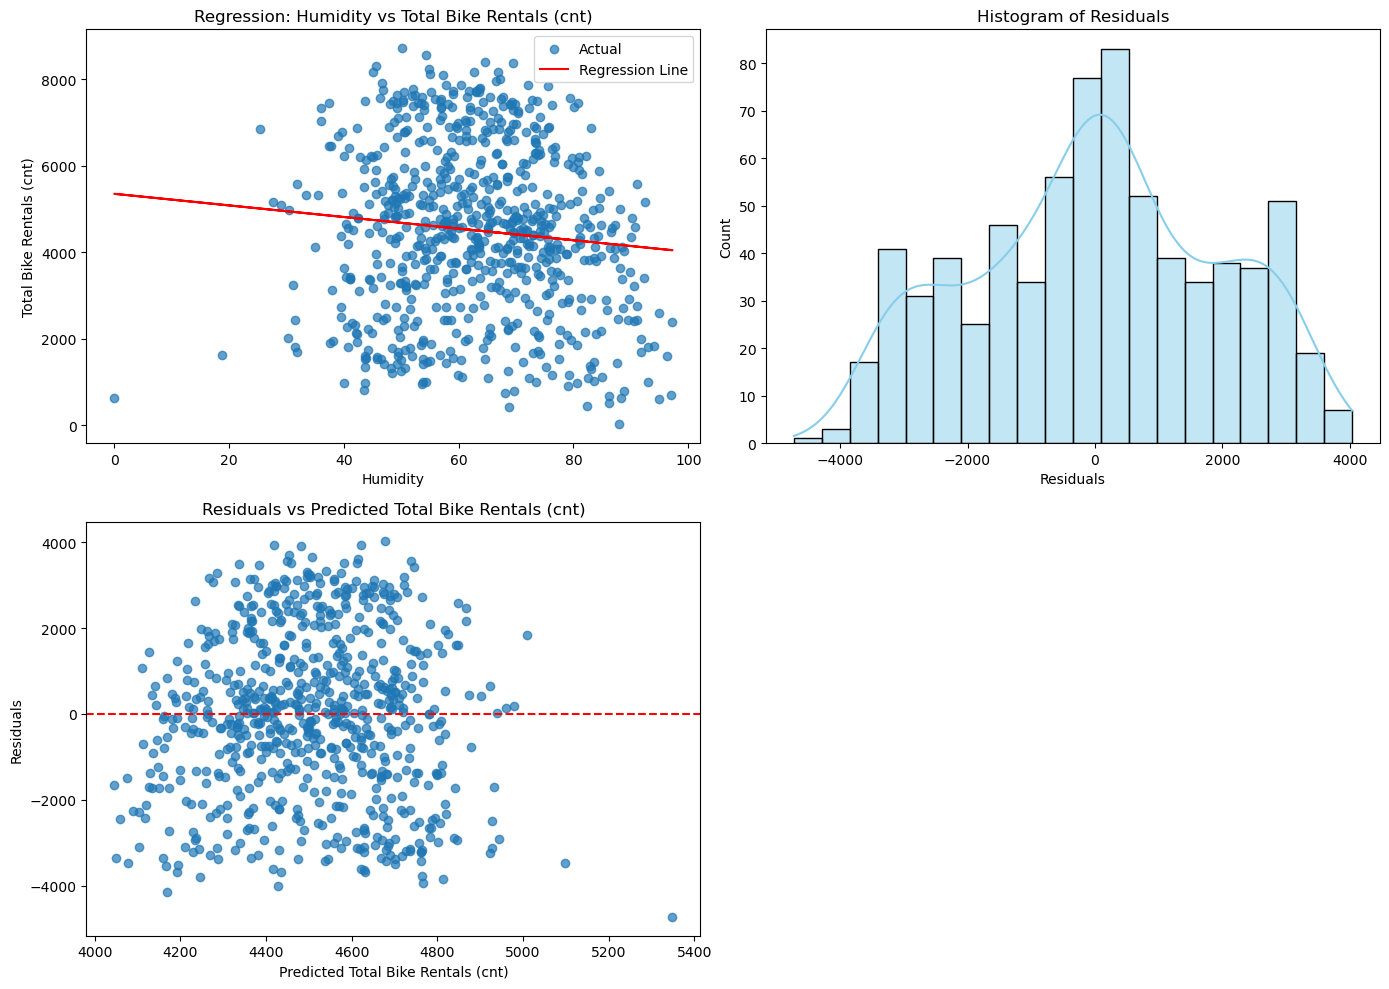

In [503]:
# Simple Linear Regression for humidity Vs cnt

# Prepare data
X = df_bikeshare[['hum']]
y = df_bikeshare['cnt']
X_const = sm.add_constant(X)

# Fit OLS regression
model = sm.OLS(y, X_const).fit()
print(model.summary())

# Hypothesis test for humidity coefficient (t-test)
t_stat = model.tvalues['hum']
p_value = model.pvalues['hum']
print(f"\nt-statistic for humidity: {t_stat:.4f}")
print(f"p-value for humidity: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H0: humidity is a significant predictor of cnt.")
else:
    print("Fail to reject H0: humidity is NOT a significant predictor of cnt.")

# Hypothesis test for overall model fit (F-test)
f_stat = model.fvalue
f_pvalue = model.f_pvalue
print(f"\nF-statistic: {f_stat:.4f}")
print(f"F-statistic p-value: {f_pvalue:.4f}")
if f_pvalue < 0.05:
    print("Reject H0: The model is significant overall.")
else:
    print("Fail to reject H0: The model is NOT significant overall.")

# R-squared
print(f"\nR-squared: {model.rsquared:.4f}")

# Residual analysis
y_pred = model.predict(X_const)
residuals = y - y_pred

# All diagnostics in one frame
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# 1. Linearity: Scatter plot
axs[0, 0].scatter(X['hum'], y, label='Actual', alpha=0.7)
axs[0, 0].plot(X['hum'], y_pred, color='red', label='Regression Line')
axs[0, 0].set_xlabel('Humidity')
axs[0, 0].set_ylabel('Total Bike Rentals (cnt)')
axs[0, 0].set_title('Regression: Humidity vs Total Bike Rentals (cnt)')
axs[0, 0].legend()

# 2. Residuals Histogram
sns.histplot(residuals, bins=20, kde=True, ax=axs[0, 1], color='skyblue', edgecolor='black')
axs[0, 1].set_title('Histogram of Residuals')
axs[0, 1].set_xlabel('Residuals')

# 3. Homoscedasticity: Residuals vs Predicted
axs[1, 0].scatter(y_pred, residuals, alpha=0.7)
axs[1, 0].axhline(0, color='red', linestyle='--')
axs[1, 0].set_xlabel('Predicted Total Bike Rentals (cnt)')
axs[1, 0].set_ylabel('Residuals')
axs[1, 0].set_title('Residuals vs Predicted Total Bike Rentals (cnt)')

# 4. Hide unused subplot
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

#### Simple Linear Regression (cnt Vs windspeed) - FIT

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     42.61
Date:                Sun, 16 Nov 2025   Prob (F-statistic):           1.25e-10
Time:                        23:48:28   Log-Likelihood:                -6539.5
No. Observations:                 730   AIC:                         1.308e+04
Df Residuals:                     728   BIC:                         1.309e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5626.3989    184.960     30.419      0.0

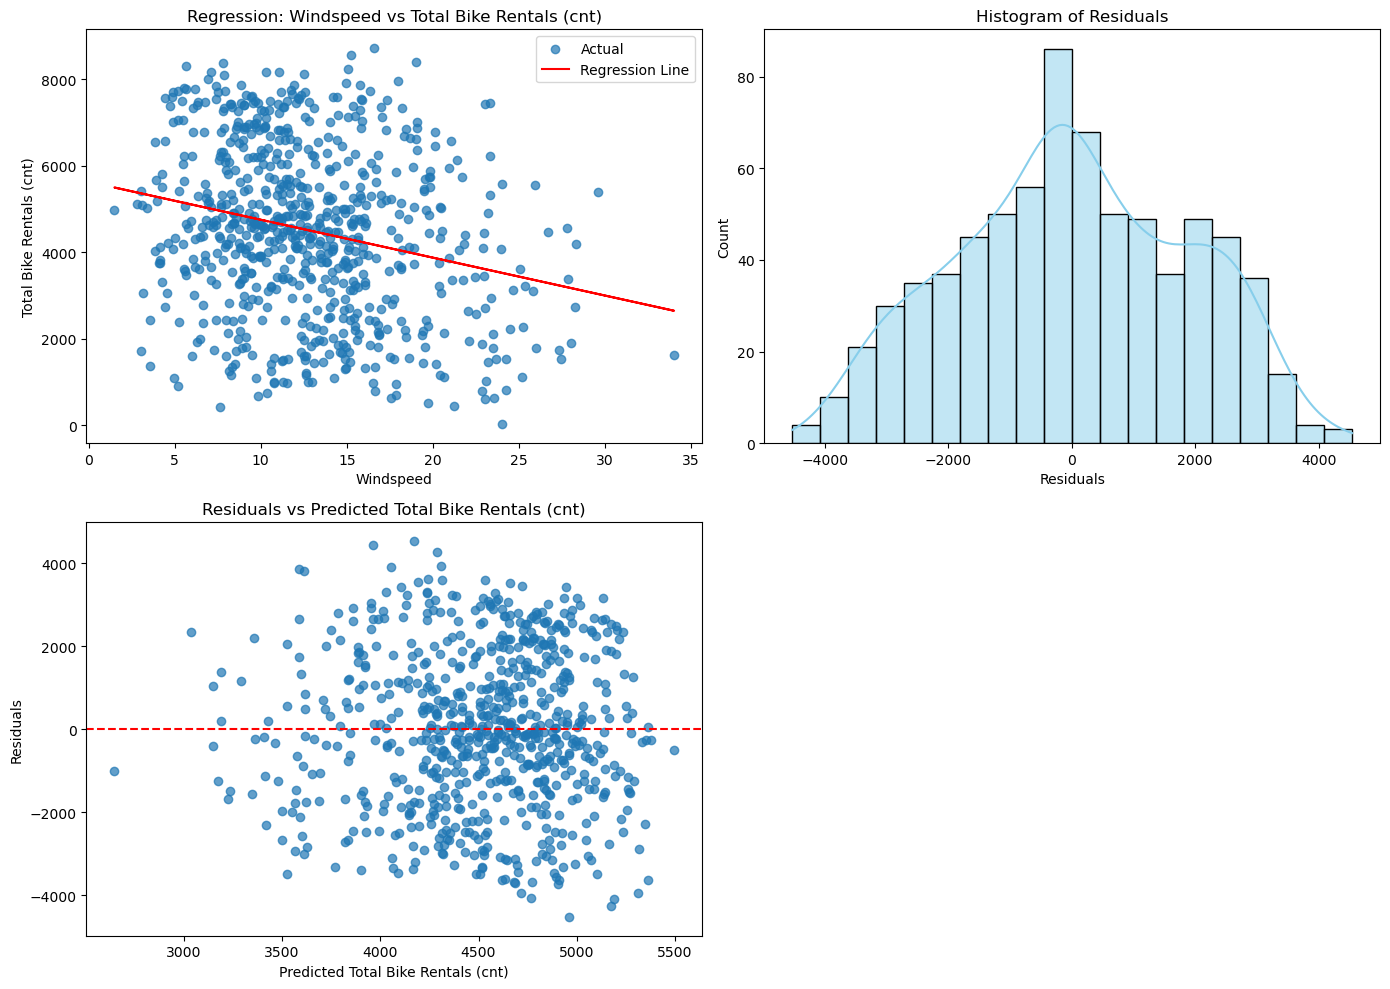

In [504]:
# Simple Linear Regression for windspeed Vs cnt

# Prepare data
X = df_bikeshare[['windspeed']]
y = df_bikeshare['cnt']
X_const = sm.add_constant(X)

# Fit OLS regression
model = sm.OLS(y, X_const).fit()
print(model.summary())

# Hypothesis test for windspeed coefficient (t-test)
t_stat = model.tvalues['windspeed']
p_value = model.pvalues['windspeed']
print(f"\nt-statistic for windspeed: {t_stat:.4f}")
print(f"p-value for windspeed: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H0: windspeed is a significant predictor of cnt.")
else:
    print("Fail to reject H0: windspeed is NOT a significant predictor of cnt.")

# Hypothesis test for overall model fit (F-test)
f_stat = model.fvalue
f_pvalue = model.f_pvalue
print(f"\nF-statistic: {f_stat:.4f}")
print(f"F-statistic p-value: {f_pvalue:.4f}")
if f_pvalue < 0.05:
    print("Reject H0: The model is significant overall.")
else:
    print("Fail to reject H0: The model is NOT significant overall.")

# R-squared
print(f"\nR-squared: {model.rsquared:.4f}")

# Residual analysis
y_pred = model.predict(X_const)
residuals = y - y_pred

# All diagnostics in one frame
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# 1. Linearity: Scatter plot
axs[0, 0].scatter(X['windspeed'], y, label='Actual', alpha=0.7)
axs[0, 0].plot(X['windspeed'], y_pred, color='red', label='Regression Line')
axs[0, 0].set_xlabel('Windspeed')
axs[0, 0].set_ylabel('Total Bike Rentals (cnt)')
axs[0, 0].set_title('Regression: Windspeed vs Total Bike Rentals (cnt)')
axs[0, 0].legend()

# 2. Residuals Histogram
sns.histplot(residuals, bins=20, kde=True, ax=axs[0, 1], color='skyblue', edgecolor='black')
axs[0, 1].set_title('Histogram of Residuals')
axs[0, 1].set_xlabel('Residuals')

# 3. Homoscedasticity: Residuals vs Predicted
axs[1, 0].scatter(y_pred, residuals, alpha=0.7)
axs[1, 0].axhline(0, color='red', linestyle='--')
axs[1, 0].set_xlabel('Predicted Total Bike Rentals (cnt)')
axs[1, 0].set_ylabel('Residuals')
axs[1, 0].set_title('Residuals vs Predicted Total Bike Rentals (cnt)')

# 4. Hide unused subplot
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

#### Simple Linear Regression (cnt Vs holiday) - NOT FIT

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.459
Date:                Sun, 16 Nov 2025   Prob (F-statistic):             0.0633
Time:                        23:48:29   Log-Likelihood:                -6558.5
No. Observations:                 730   AIC:                         1.312e+04
Df Residuals:                     728   BIC:                         1.313e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4530.9027     72.586     62.421      0.0

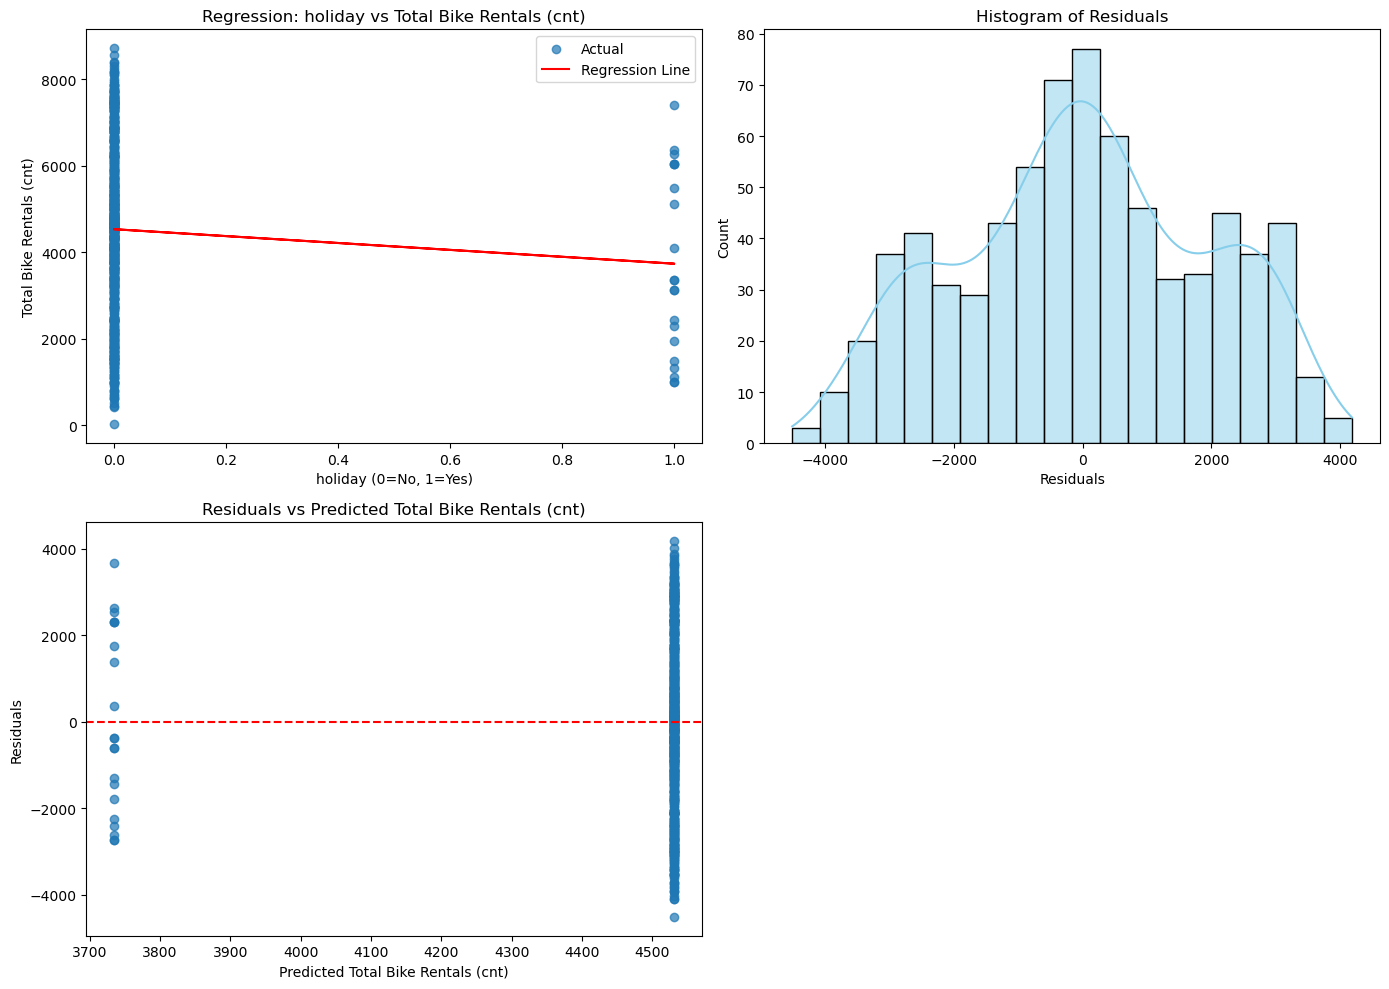

In [505]:
# Simple Linear Regression for holiday Vs cnt

# Convert 'holiday' to binary (0/1) if not already
X = (df_bikeshare['holiday'] == 'yes').astype(int).values.reshape(-1, 1)
y = df_bikeshare['cnt']
X_const = sm.add_constant(X)

# Fit OLS regression
model = sm.OLS(y, X_const).fit()
print(model.summary())

# Hypothesis test for holiday coefficient (t-test)
t_stat = model.tvalues[1]  # index 1 for holiday
p_value = model.pvalues[1]
print(f"\nt-statistic for holiday: {t_stat:.4f}")
print(f"p-value for holiday: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H0: holiday is a significant predictor of cnt.")
else:
    print("Fail to reject H0: holiday is NOT a significant predictor of cnt.")

# Hypothesis test for overall model fit (F-test)
f_stat = model.fvalue
f_pvalue = model.f_pvalue
print(f"\nF-statistic: {f_stat:.4f}")
print(f"F-statistic p-value: {f_pvalue:.4f}")
if f_pvalue < 0.05:
    print("Reject H0: The model is significant overall.")
else:
    print("Fail to reject H0: The model is NOT significant overall.")

# R-squared
print(f"\nR-squared: {model.rsquared:.4f}")

# Residual analysis
y_pred = model.predict(X_const)
residuals = y - y_pred

# All diagnostics in one frame
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# 1. Linearity: Scatter plot
axs[0, 0].scatter(X, y, label='Actual', alpha=0.7)
axs[0, 0].plot(X, y_pred, color='red', label='Regression Line')
axs[0, 0].set_xlabel('holiday (0=No, 1=Yes)')
axs[0, 0].set_ylabel('Total Bike Rentals (cnt)')
axs[0, 0].set_title('Regression: holiday vs Total Bike Rentals (cnt)')
axs[0, 0].legend()

# 2. Residuals Histogram
sns.histplot(residuals, bins=20, kde=True, ax=axs[0, 1], color='skyblue', edgecolor='black')
axs[0, 1].set_title('Histogram of Residuals')
axs[0, 1].set_xlabel('Residuals')

# 3. Homoscedasticity: Residuals vs Predicted
axs[1, 0].scatter(y_pred, residuals, alpha=0.7)
axs[1, 0].axhline(0, color='red', linestyle='--')
axs[1, 0].set_xlabel('Predicted Total Bike Rentals (cnt)')
axs[1, 0].set_ylabel('Residuals')
axs[1, 0].set_title('Residuals vs Predicted Total Bike Rentals (cnt)')

# 4. Hide unused subplot
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

#### Simple Linear Regression (cnt with workingday) - NOT FIT

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.859
Date:                Sun, 16 Nov 2025   Prob (F-statistic):             0.0913
Time:                        23:48:29   Log-Likelihood:                -6558.8
No. Observations:                 730   AIC:                         1.312e+04
Df Residuals:                     728   BIC:                         1.313e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4330.1688    127.218     34.037      0.0

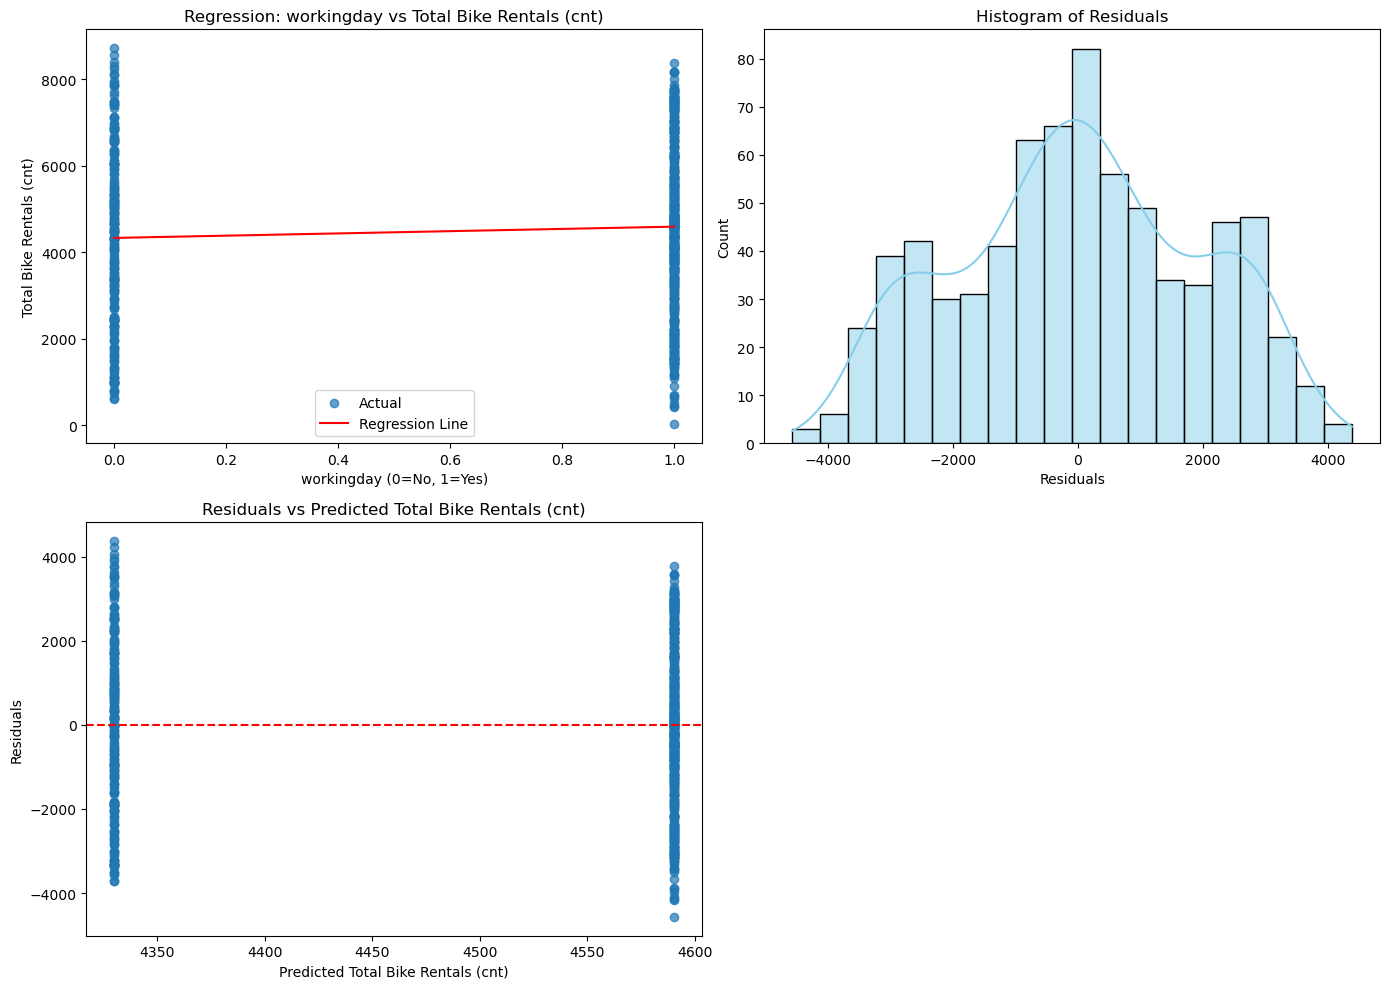

In [506]:
# Simple Linear Regression for workingday Vs cnt

# Convert 'workingday' to binary (0/1) if not already
X = (df_bikeshare['workingday'] == 'yes').astype(int).values.reshape(-1, 1)
y = df_bikeshare['cnt']
X_const = sm.add_constant(X)

# Fit OLS regression
model = sm.OLS(y, X_const).fit()
print(model.summary())

# Hypothesis test for workingday coefficient (t-test)
t_stat = model.tvalues[1]  # index 1 for workingday
p_value = model.pvalues[1]
print(f"\nt-statistic for workingday: {t_stat:.4f}")
print(f"p-value for workingday: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H0: workingday is a significant predictor of cnt.")
else:
    print("Fail to reject H0: workingday is NOT a significant predictor of cnt.")

# Hypothesis test for overall model fit (F-test)
f_stat = model.fvalue
f_pvalue = model.f_pvalue
print(f"\nF-statistic: {f_stat:.4f}")
print(f"F-statistic p-value: {f_pvalue:.4f}")
if f_pvalue < 0.05:
    print("Reject H0: The model is significant overall.")
else:
    print("Fail to reject H0: The model is NOT significant overall.")

# R-squared
print(f"\nR-squared: {model.rsquared:.4f}")

# Residual analysis
y_pred = model.predict(X_const)
residuals = y - y_pred

# All diagnostics in one frame
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# 1. Linearity: Scatter plot
axs[0, 0].scatter(X, y, label='Actual', alpha=0.7)
axs[0, 0].plot(X, y_pred, color='red', label='Regression Line')
axs[0, 0].set_xlabel('workingday (0=No, 1=Yes)')
axs[0, 0].set_ylabel('Total Bike Rentals (cnt)')
axs[0, 0].set_title('Regression: workingday vs Total Bike Rentals (cnt)')
axs[0, 0].legend()

# 2. Residuals Histogram
sns.histplot(residuals, bins=20, kde=True, ax=axs[0, 1], color='skyblue', edgecolor='black')
axs[0, 1].set_title('Histogram of Residuals')
axs[0, 1].set_xlabel('Residuals')

# 3. Homoscedasticity: Residuals vs Predicted
axs[1, 0].scatter(y_pred, residuals, alpha=0.7)
axs[1, 0].axhline(0, color='red', linestyle='--')
axs[1, 0].set_xlabel('Predicted Total Bike Rentals (cnt)')
axs[1, 0].set_ylabel('Residuals')
axs[1, 0].set_title('Residuals vs Predicted Total Bike Rentals (cnt)')

# 4. Hide unused subplot
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

### Summary: Simple Linear Regression



| Model             | Predictor     | R²     | p-value  | Significance      | Model Fit Status  |
|-------------------|---------------|--------|----------|-------------------|-------------------|
| cnt Vs temp       | Temperature   | ~0.59  | <0.05    | Significant       | **GOOD FIT**      |
| cnt Vs humidity   | Humidity      | ~0.22  | <0.05    | Significant       | **FAIR FIT**      |
| cnt Vs windspeed  | Windspeed     | ~0.10  | <0.05    | Significant       | **WEAK FIT**      |
| cnt Vs holiday    | Holiday       | ~0.006 | >0.05    | NOT Significant   | **NOT FIT**       |
| cnt Vs workingday | Workingday    | ~0.006 | >0.05    | NOT Significant   | **NOT FIT**       |

**Conclusion:** 
- Temperature is the strongest single predictor (R²≈0.59), humidity is moderately useful (R²≈0.22), windspeed has weak predictive power (R²≈0.10).
- Holiday and workingday are not individually significant and should be excluded from simple models in favor of multiple regression with dummy variables.

### Multiple Linear Regression

##### Prepare Base Data

In [507]:
# Prepare Base Data for Multiple Linear Regression
X_base = df_bikeshare_dummies.drop(columns=['cnt'])
y_base = df_bikeshare_dummies['cnt']

print(f"Data prepared: {X_base.shape[0]} observations, {X_base.shape[1]} features")

Data prepared: 730 observations, 28 features


##### Model 1: Unscaled full scope of features


MODEL: UNSCALED MODEL
Scaling Method:      None
RFE Applied:         False
Total Features:      27.0
Observations:        730.0
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     144.7
Date:                Sun, 16 Nov 2025   Prob (F-statistic):          8.77e-266
Time:                        23:48:29   Log-Likelihood:                -5873.4
No. Observations:                 730   AIC:                         1.180e+04
Df Residuals:                     702   BIC:                         1.193e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.02

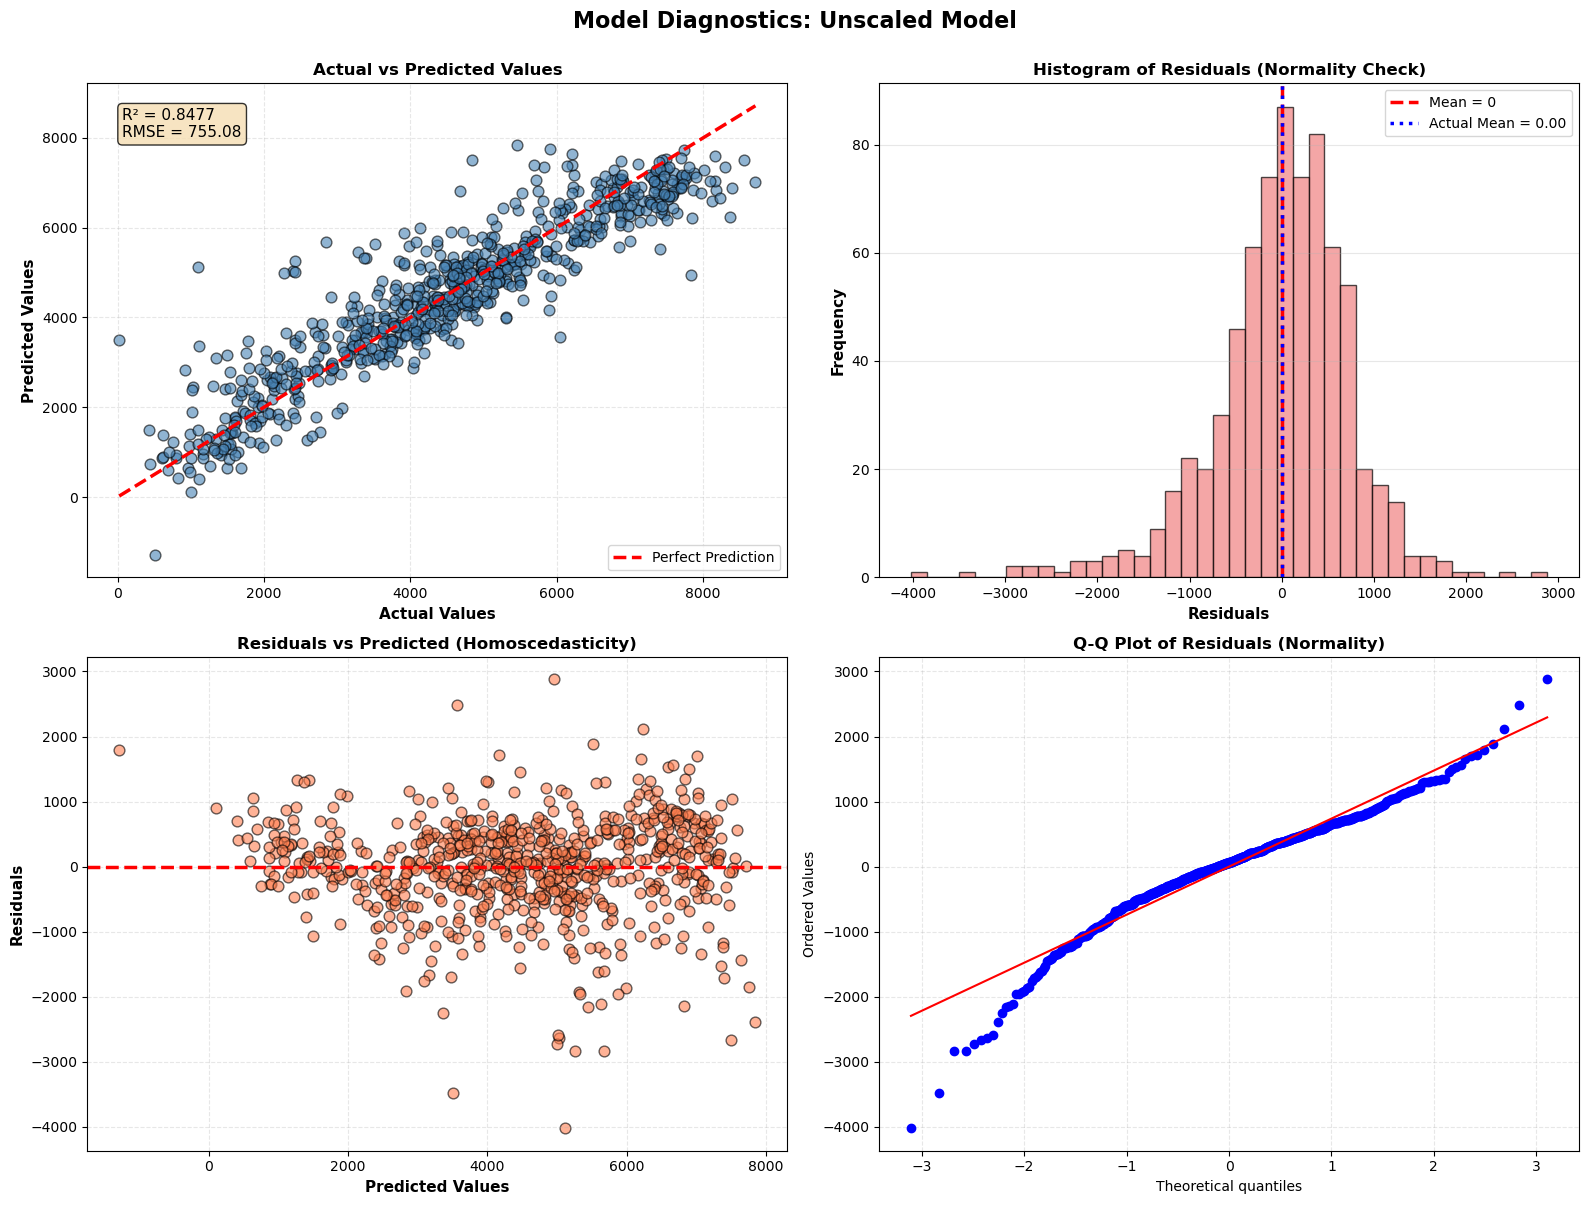

<Figure size 640x480 with 0 Axes>

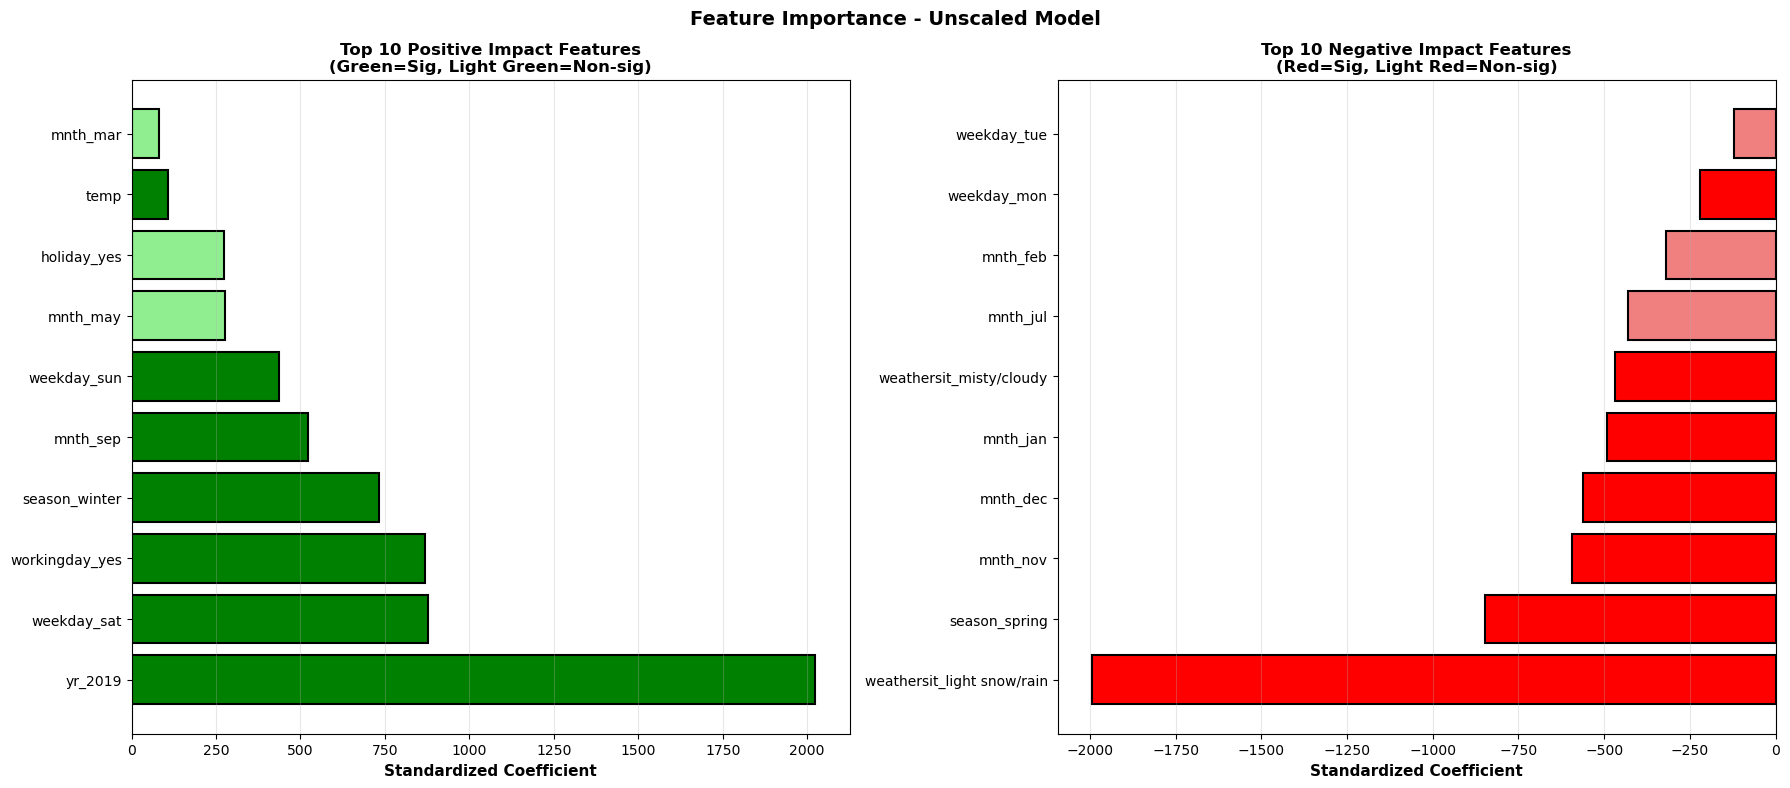

In [508]:
# Step 1: Unscaled Data without RFE
model_1, X_1_const = fit_linear_regression_model(X_base, y_base, "Unscaled")

# Step 2: Predictions and Residuals
y_pred_1 = model_1.predict(X_1_const)
residuals_1 = y_base - y_pred_1

# Step 3: Calculate Metrics
metrics_1 = calculate_model_metrics(y_base, y_pred_1, model_1)

# Step 4: Print Model Summary and Significant Variables
print_model_summary(model_1, "Unscaled Model", scaling_method="None", rfe_applied=False)
print_significant_variables(model_1, "Unscaled")
plot_model_diagnostics(y_base, y_pred_1, residuals_1, "Unscaled Model")
plot_feature_importance(model_1, "Unscaled Model")

##### Model 2: StandardScalar + RFE (10 features)

Using StandardScaler (mean=0, std=1)...
  Features scaled successfully!
   Shape: (730, 28)

RECURSIVE FEATURE ELIMINATION (RFE)

RFE Configuration:
  • Total features: 28
  • Target features: 10
  • Elimination step: 1

 RFE COMPLETED!

Selected Features (10):
----------------------------------------------------------------------------------------------------
 1. temp                                               (Ranking: 1)
 2. hum                                                (Ranking: 1)
 3. windspeed                                          (Ranking: 1)
 4. season_spring                                      (Ranking: 1)
 5. season_winter                                      (Ranking: 1)
 6. yr_2019                                            (Ranking: 1)
 7. mnth_jul                                           (Ranking: 1)
 8. mnth_nov                                           (Ranking: 1)
 9. weathersit_light snow/rain                         (Ranking: 1)
10. weathersit_misty/clou

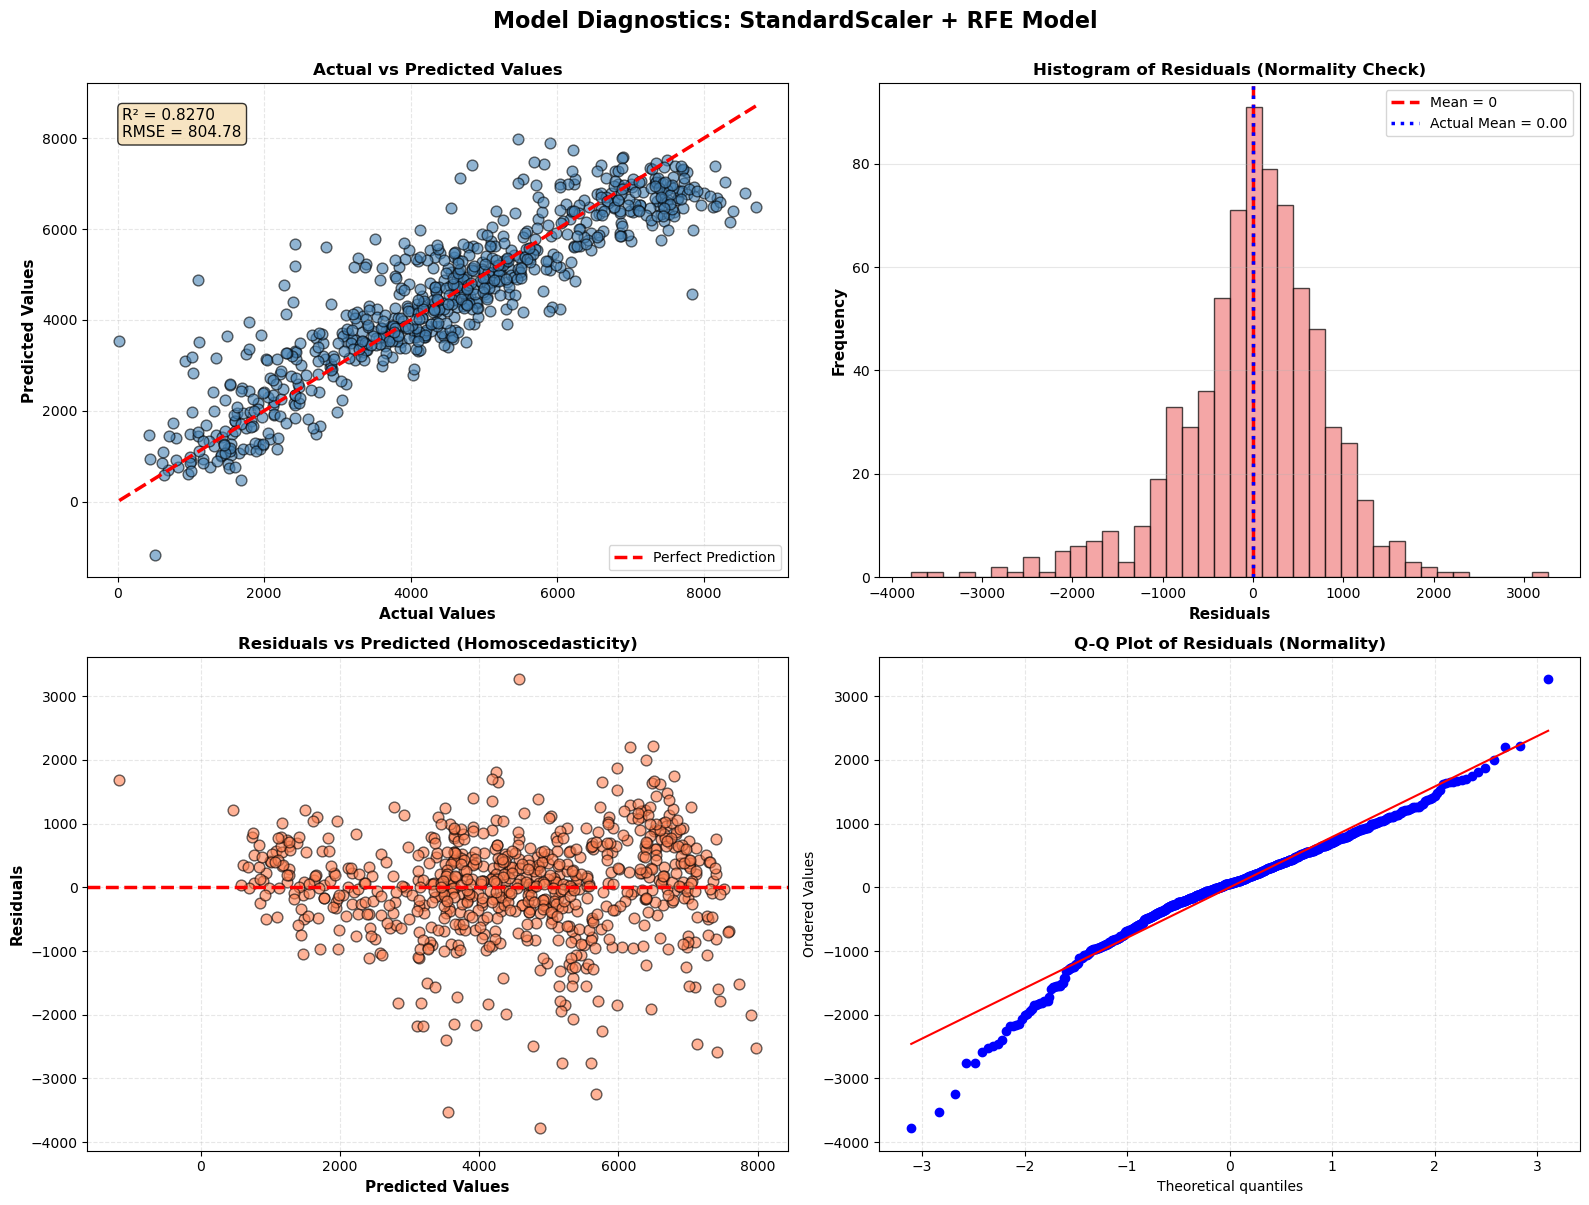

<Figure size 640x480 with 0 Axes>

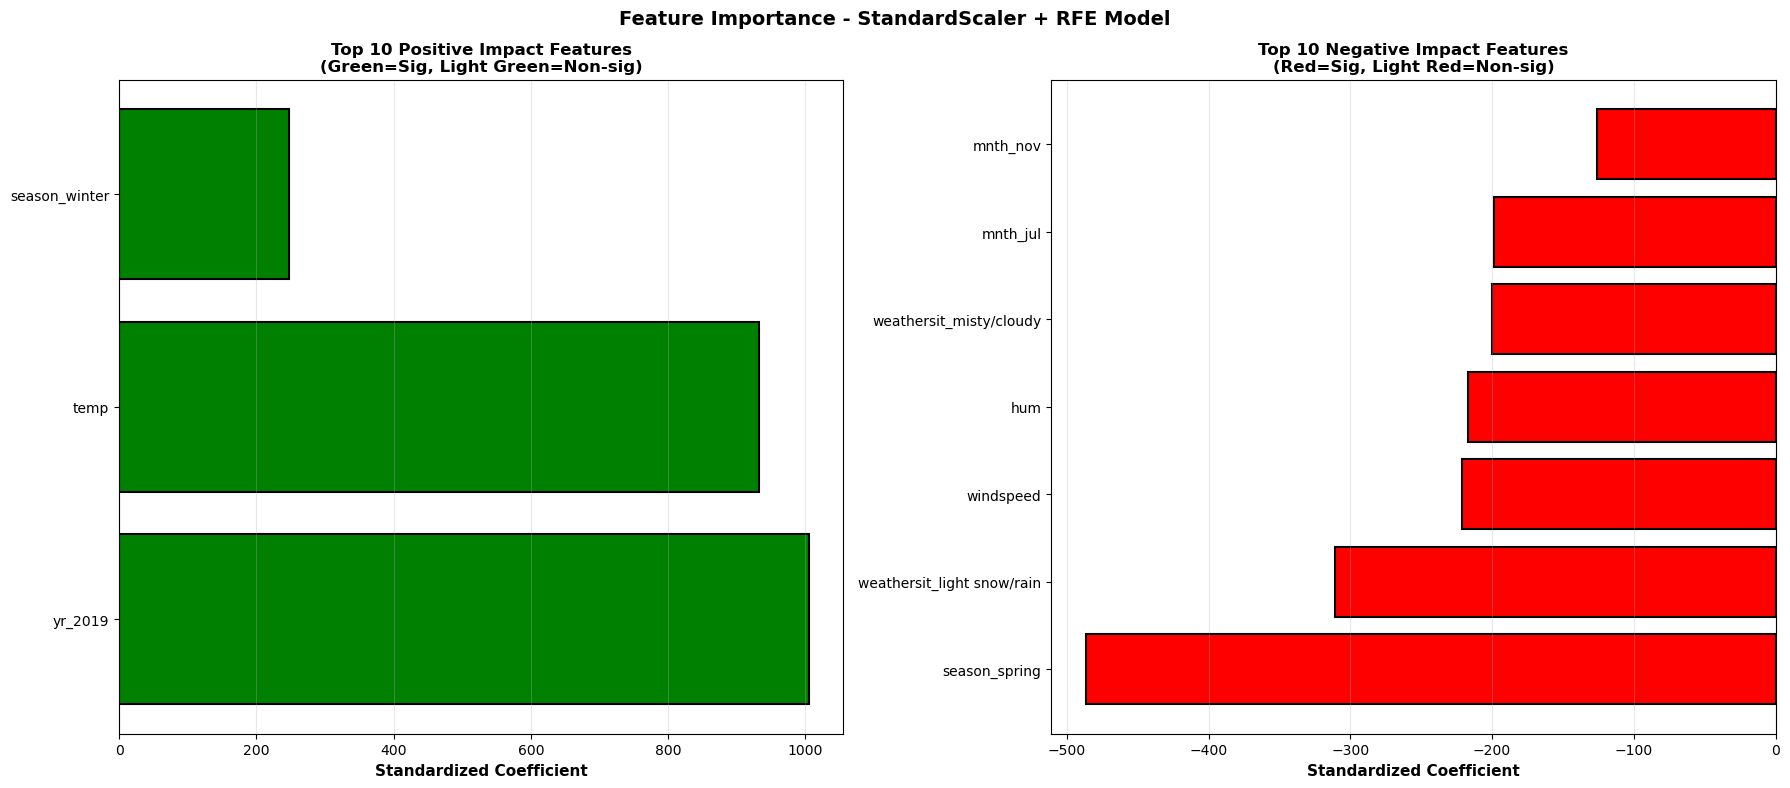

In [509]:
# Step 1: Scale features using StandardScaler
X_std_scaled, std_scaler = scale_features(X_base, scaler_type='standard')

# Step 2: Apply RFE on StandardScaled features
X_rfe_std, rfe_std_obj, selected_features_std, eliminated_features_std = apply_rfe(
    X_std_scaled, y_base, n_features=10, step=1
)

# Step 3: Fit model with selected features
model_2, X_2_const = fit_linear_regression_model(X_rfe_std, y_base, "StandardScaler + RFE")
y_pred_2 = model_2.predict(X_2_const)
residuals_2 = y_base - y_pred_2
metrics_2 = calculate_model_metrics(y_base, y_pred_2, model_2)

# Step 4: Print comprehensive model summary
print_model_summary(model_2, "StandardScaler + RFE", 
                   scaling_method="StandardScaler", rfe_applied=True)
print_significant_variables(model_2, "StandardScaler + RFE")
plot_model_diagnostics(y_base, y_pred_2, residuals_2, "StandardScaler + RFE Model")
plot_feature_importance(model_2, "StandardScaler + RFE Model")

##### Model 3: MinMaxScalar + RFE (10 features)

Using MinMaxScaler (range=[0,1])...
  Features scaled successfully!
   Shape: (730, 28)

RECURSIVE FEATURE ELIMINATION (RFE)

RFE Configuration:
  • Total features: 28
  • Target features: 10
  • Elimination step: 1

 RFE COMPLETED!

Selected Features (10):
----------------------------------------------------------------------------------------------------
 1. temp                                               (Ranking: 1)
 2. hum                                                (Ranking: 1)
 3. windspeed                                          (Ranking: 1)
 4. season_spring                                      (Ranking: 1)
 5. season_winter                                      (Ranking: 1)
 6. yr_2019                                            (Ranking: 1)
 7. mnth_jul                                           (Ranking: 1)
 8. mnth_nov                                           (Ranking: 1)
 9. mnth_sep                                           (Ranking: 1)
10. weathersit_light snow/rai

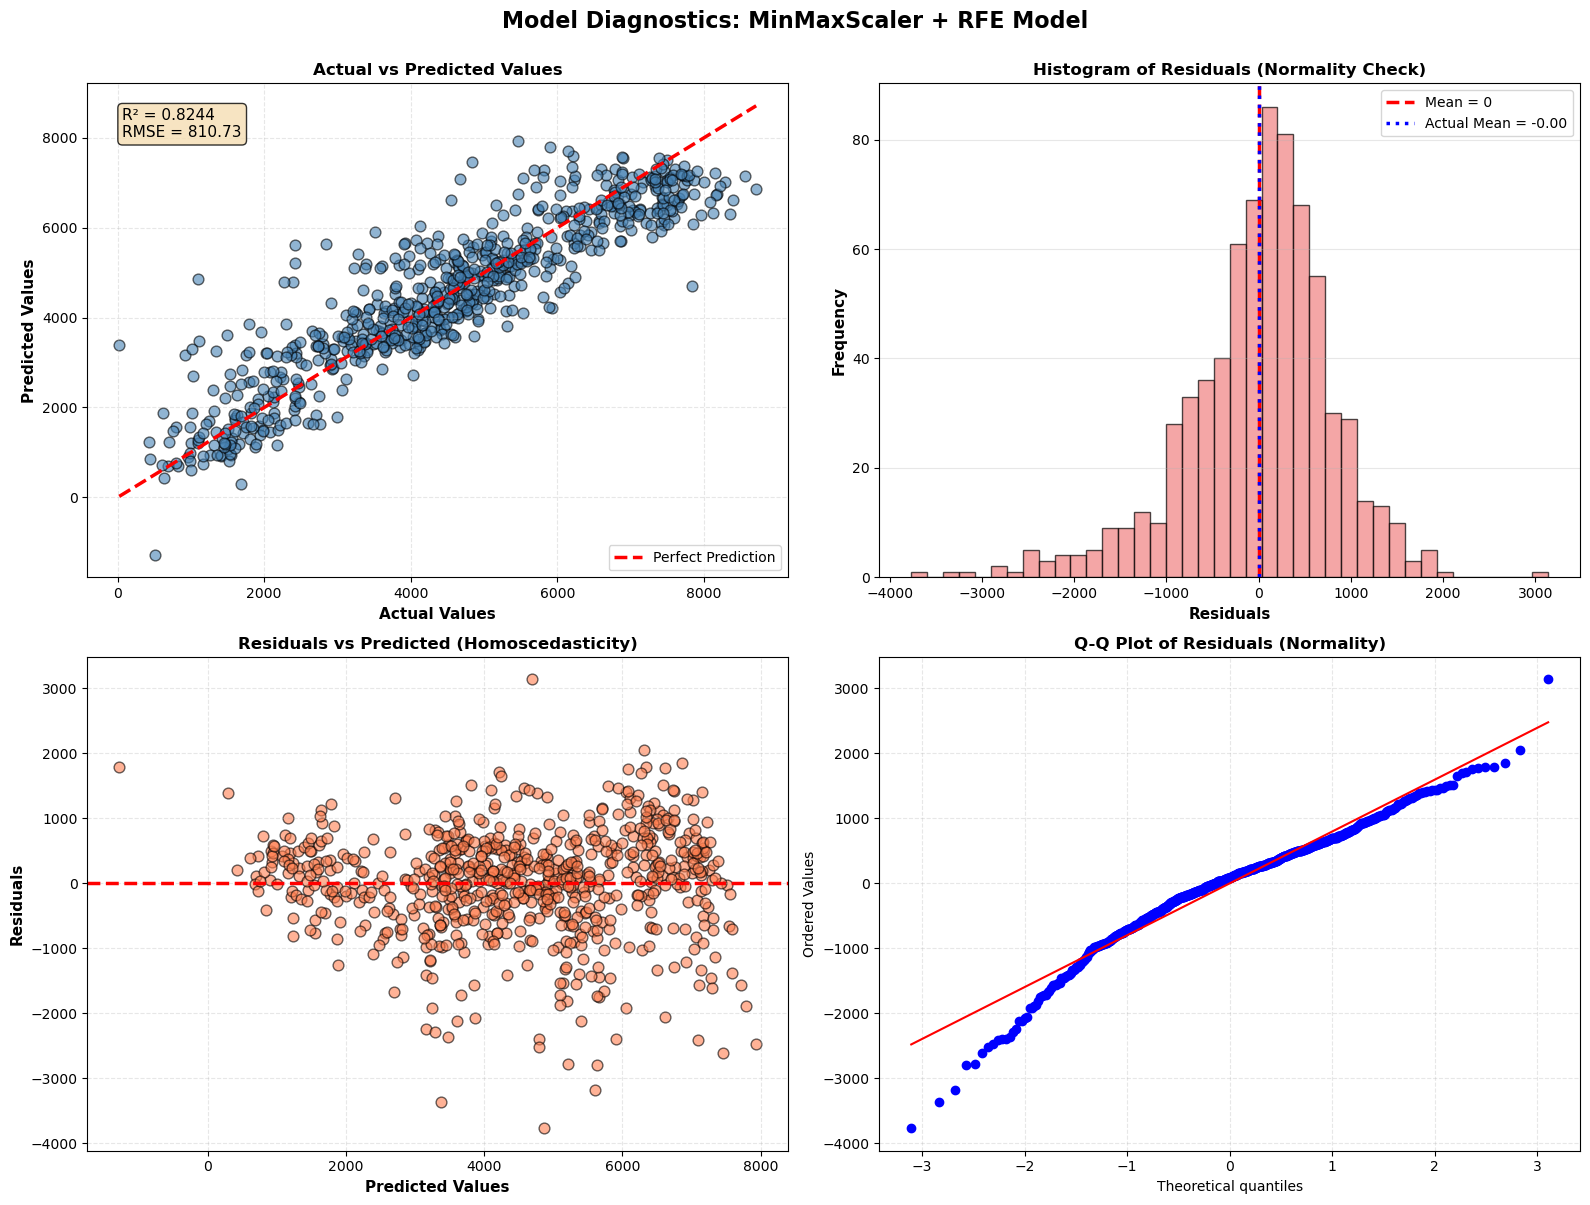

<Figure size 640x480 with 0 Axes>

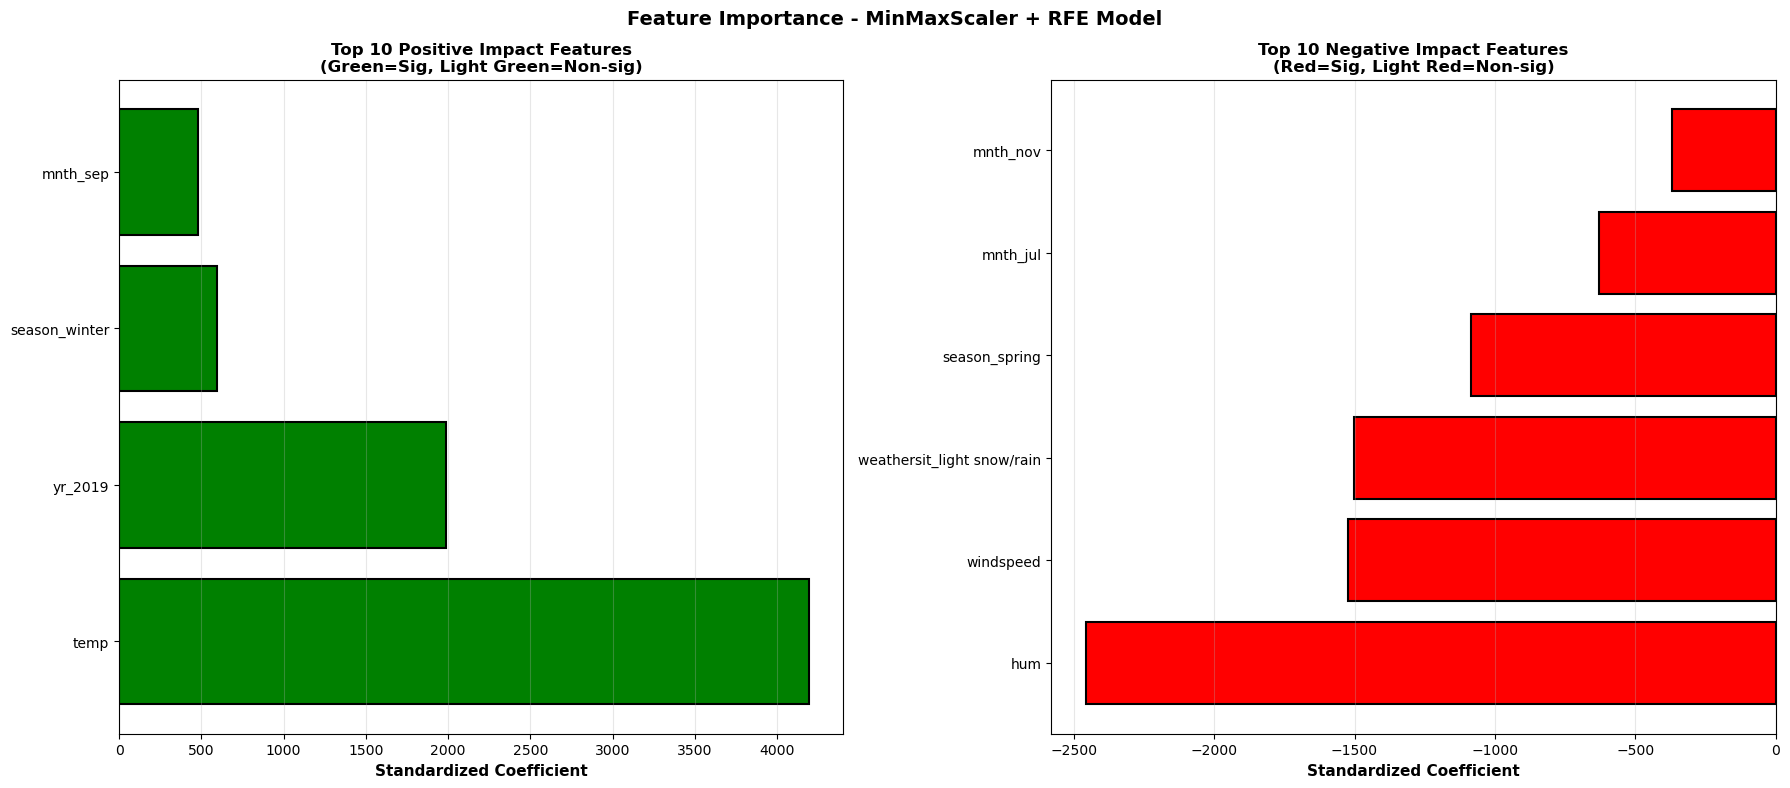

In [510]:
# Step 1: Scale features using MinMaxScaler
X_minmax_scaled, minmax_scaler = scale_features(X_base, scaler_type='minmax')

# Step 2: Apply RFE on MinMaxScaled features
X_rfe, rfe_obj, selected_features, eliminated_features = apply_rfe(X_minmax_scaled, y_base, 
                                                               n_features=10, step=1)
# Step 3: Fit model with selected features
model_3, X_3_const = fit_linear_regression_model(X_rfe, y_base, "MinMax + RFE")
y_pred_3 = model_3.predict(X_3_const)
residuals_3 = y_base - y_pred_3
metrics_3 = calculate_model_metrics(y_base, y_pred_3, model_3)

# Step 4: Print comprehensive model summary
print_model_summary(model_3, "MinMaxScaler + RFE", scaling_method="MinMaxScaler", rfe_applied=True)
print_significant_variables(model_3, "MinMaxScaler + RFE")
plot_model_diagnostics(y_base, y_pred_3, residuals_3, "MinMaxScaler + RFE Model")
plot_feature_importance(model_3, "MinMaxScaler + RFE Model")

##### Model 4: MinMaxScaler + Statistical Feature Selection (16 features selected)

Using MinMaxScaler (range=[0,1])...
  Features scaled successfully!
   Shape: (730, 28)

STATISTICAL FEATURE SELECTION (P-VALUE BASED)

Selection Criteria: p-value < 0.05
Total features: 28

 STATISTICAL SELECTION COMPLETED!

Selected Features: 16 (p < 0.05)
----------------------------------------------------------------------------------------------------
 1. yr_2019                                       (p-value: 0.000000, coef: 2024.5440)
 2. temp                                          (p-value: 0.000000, coef: 3519.7321)
 3. workingday_yes                                (p-value: 0.000000, coef: 904.0561)
 4. weathersit_light snow/rain                    (p-value: 0.000000, coef: -1995.2217)
 5. weekday_sat                                   (p-value: 0.000000, coef: 911.6808)
 6. windspeed                                     (p-value: 0.000000, coef: -1430.0771)
 7. weathersit_misty/cloudy                       (p-value: 0.000000, coef: -468.9484)
 8. hum                        

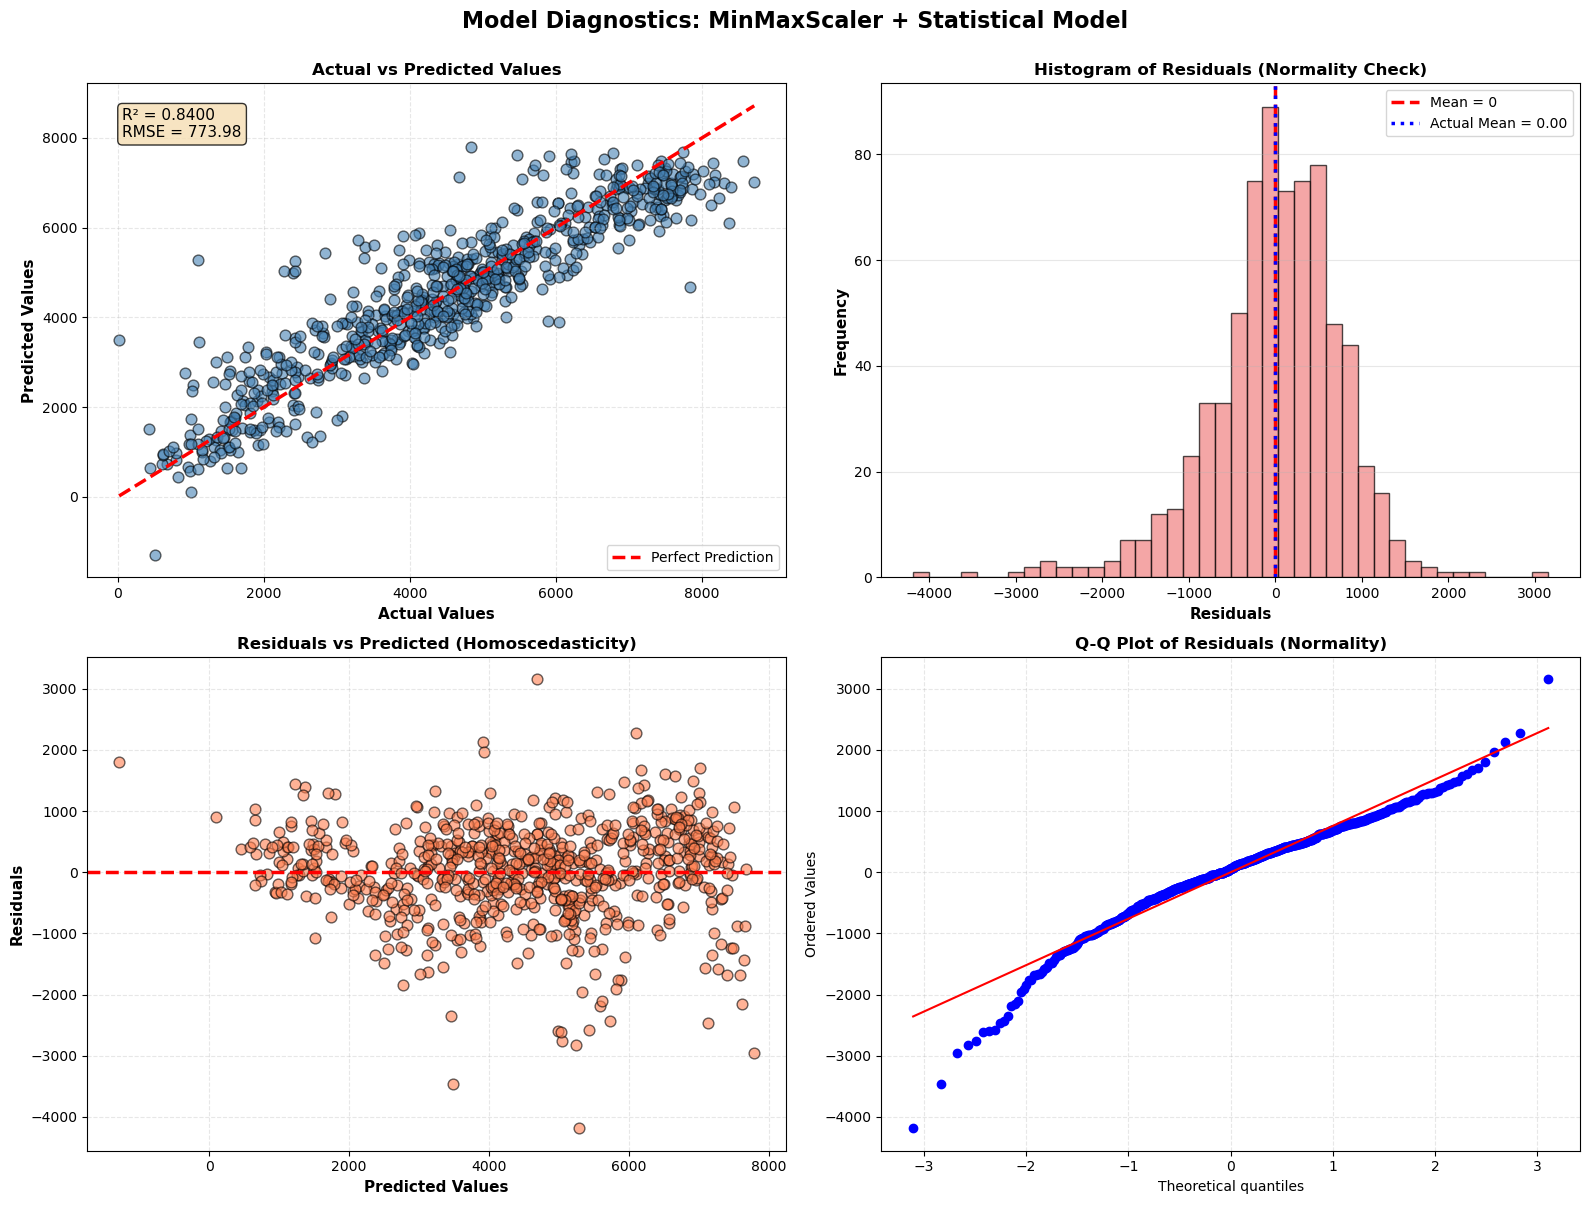

<Figure size 640x480 with 0 Axes>

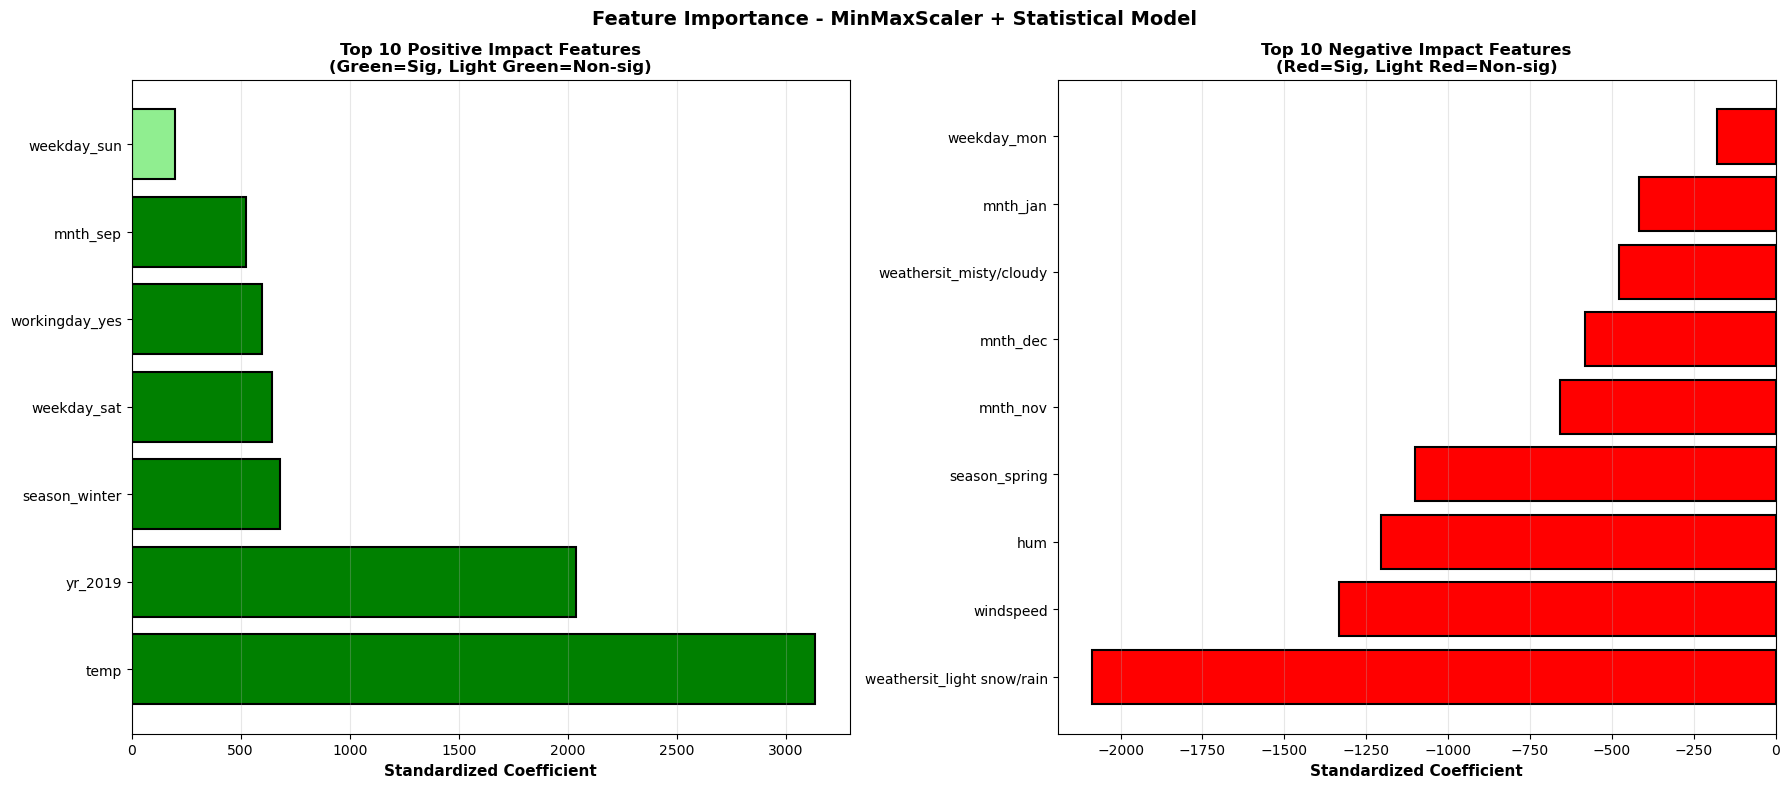


DETAILED STATISTICAL FEATURE SELECTION ANALYSIS

 ALL FEATURES RANKED BY P-VALUE:
----------------------------------------------------------------------------------------------------
                   Feature  Coefficient  Std Error  t-statistic       p-value  Significant
                   yr_2019  2024.543998  58.302776    34.724659 1.496341e-154         True
                      temp  3519.732105 329.745749    10.674079  9.450132e-25         True
            workingday_yes   904.056134  88.320309    10.236107  5.146322e-23         True
weathersit_light snow/rain -1995.221663 196.971515   -10.129493  1.337141e-22         True
               weekday_sat   911.680791  99.094540     9.200111  4.020523e-19         True
                 windspeed -1430.077102 199.816516    -7.156951  2.082741e-12         True
   weathersit_misty/cloudy  -468.948393  77.059450    -6.085540  1.909015e-09         True
                       hum -1429.816386 284.133645    -5.032197  6.167066e-07         Tr

In [511]:
# Step 1: Scale features using MinMaxScaler
X_minmax_stat, minmax_scaler_stat = scale_features(X_base, scaler_type='minmax')

# Step 2: Apply Statistical Feature Selection on MinMaxScaled features
X_stat_selected, stat_selected_features, stat_eliminated_features, stat_feature_stats = \
    apply_statistical_selection(X_minmax_stat, y_base, alpha=0.05)

# Step 3: Fit model with selected features
model_4, X_4_const = fit_linear_regression_model(X_stat_selected, y_base, 
                                                  "MinMaxScaler + Statistical")
y_pred_4 = model_4.predict(X_4_const)
residuals_4 = y_base - y_pred_4
metrics_4 = calculate_model_metrics(y_base, y_pred_4, model_4)

# Step 4: Print comprehensive model summary
print_model_summary(model_4, "MinMaxScaler + Statistical (p < 0.05)", 
                   scaling_method="MinMaxScaler", rfe_applied=False)
print_significant_variables(model_4, "MinMaxScaler + Statistical")
plot_model_diagnostics(y_base, y_pred_4, residuals_4, "MinMaxScaler + Statistical Model")
plot_feature_importance(model_4, "MinMaxScaler + Statistical Model")

# Step 5: Print detailed statistical feature selection results
print_statistical_selection_details(stat_feature_stats, stat_selected_features, 
                                    stat_eliminated_features)

##### Model 5: StandardScaler + Statistical Feature Selection (16 features selected)

Using StandardScaler (mean=0, std=1)...
  Features scaled successfully!
   Shape: (730, 28)

STATISTICAL FEATURE SELECTION (P-VALUE BASED)

Selection Criteria: p-value < 0.05
Total features: 28

 STATISTICAL SELECTION COMPLETED!

Selected Features: 17 (p < 0.05)
----------------------------------------------------------------------------------------------------
 1. yr_2019                                       (p-value: 0.000000, coef: 1012.2720)
 2. temp                                          (p-value: 0.000000, coef: 800.3188)
 3. weathersit_light snow/rain                    (p-value: 0.000000, coef: -333.5040)
 4. windspeed                                     (p-value: 0.000000, coef: -225.3900)
 5. weathersit_misty/cloudy                       (p-value: 0.000000, coef: -221.6626)
 6. hum                                           (p-value: 0.000001, coef: -209.6421)
 7. weekday_sun                                   (p-value: 0.000047, coef: -102.3676)
 8. season_spring           

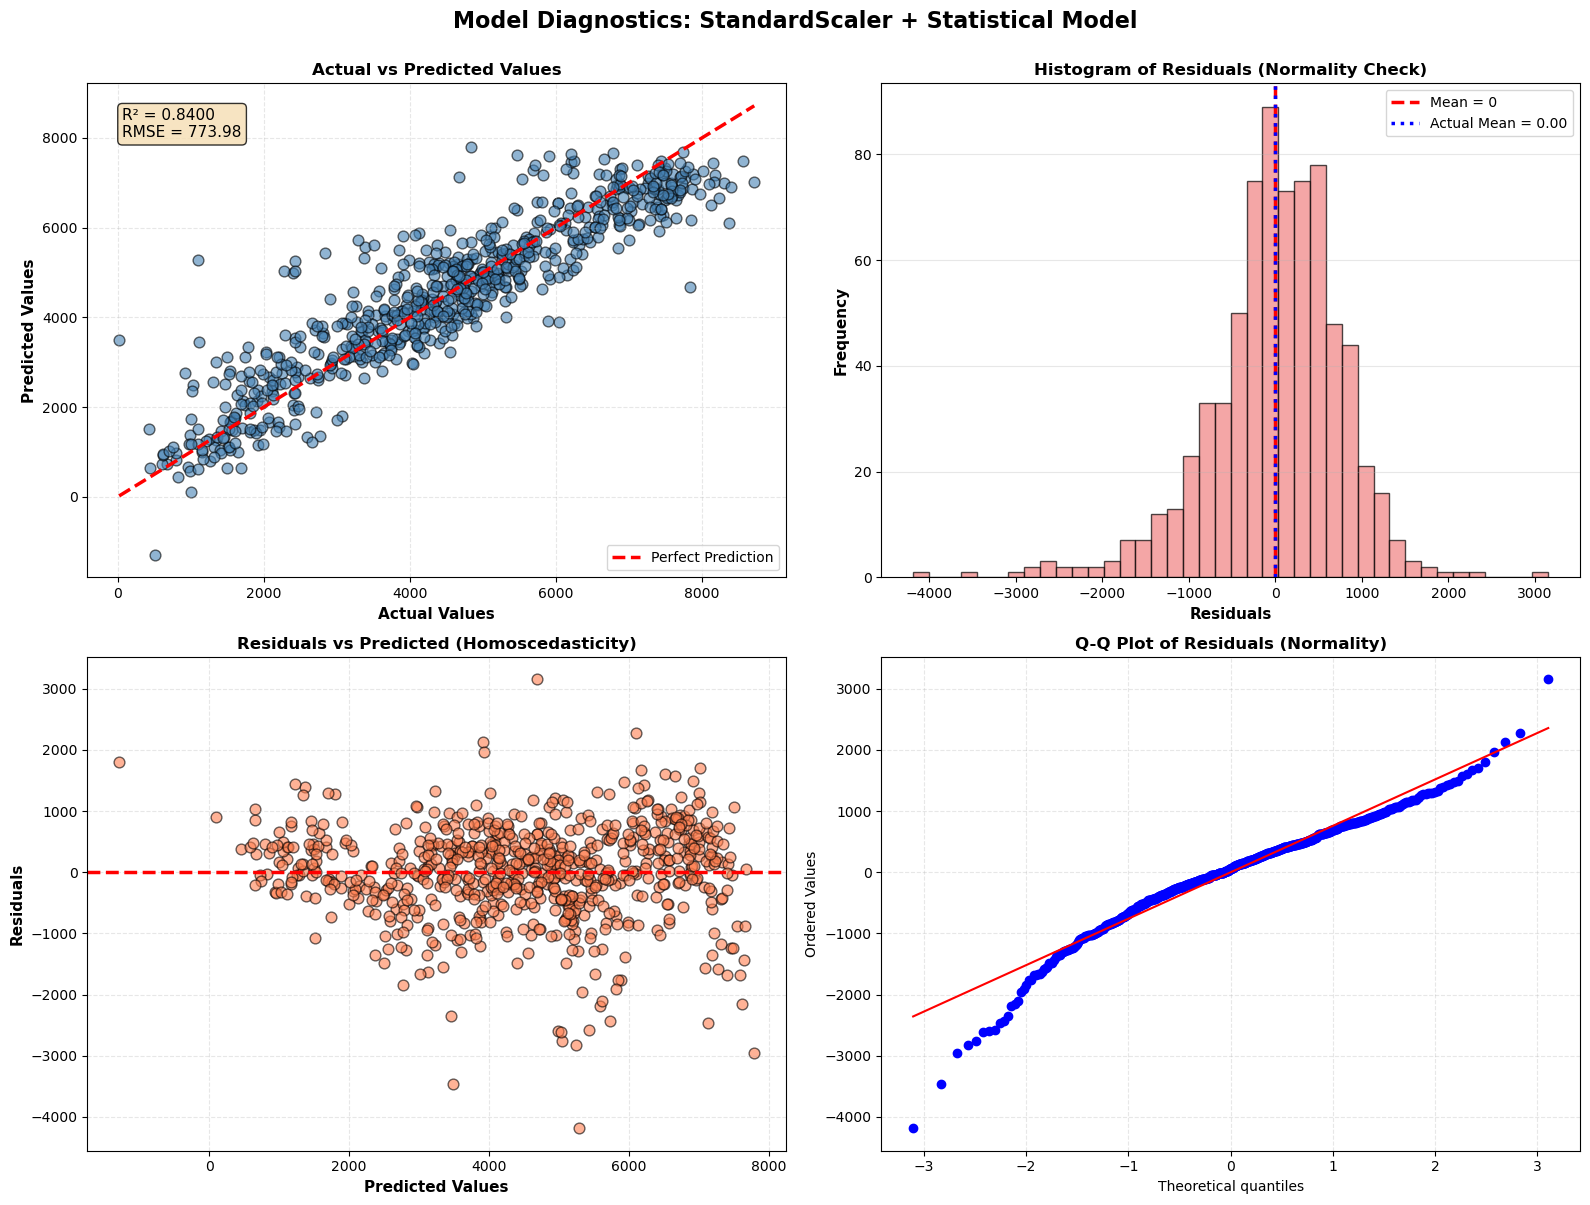

<Figure size 640x480 with 0 Axes>

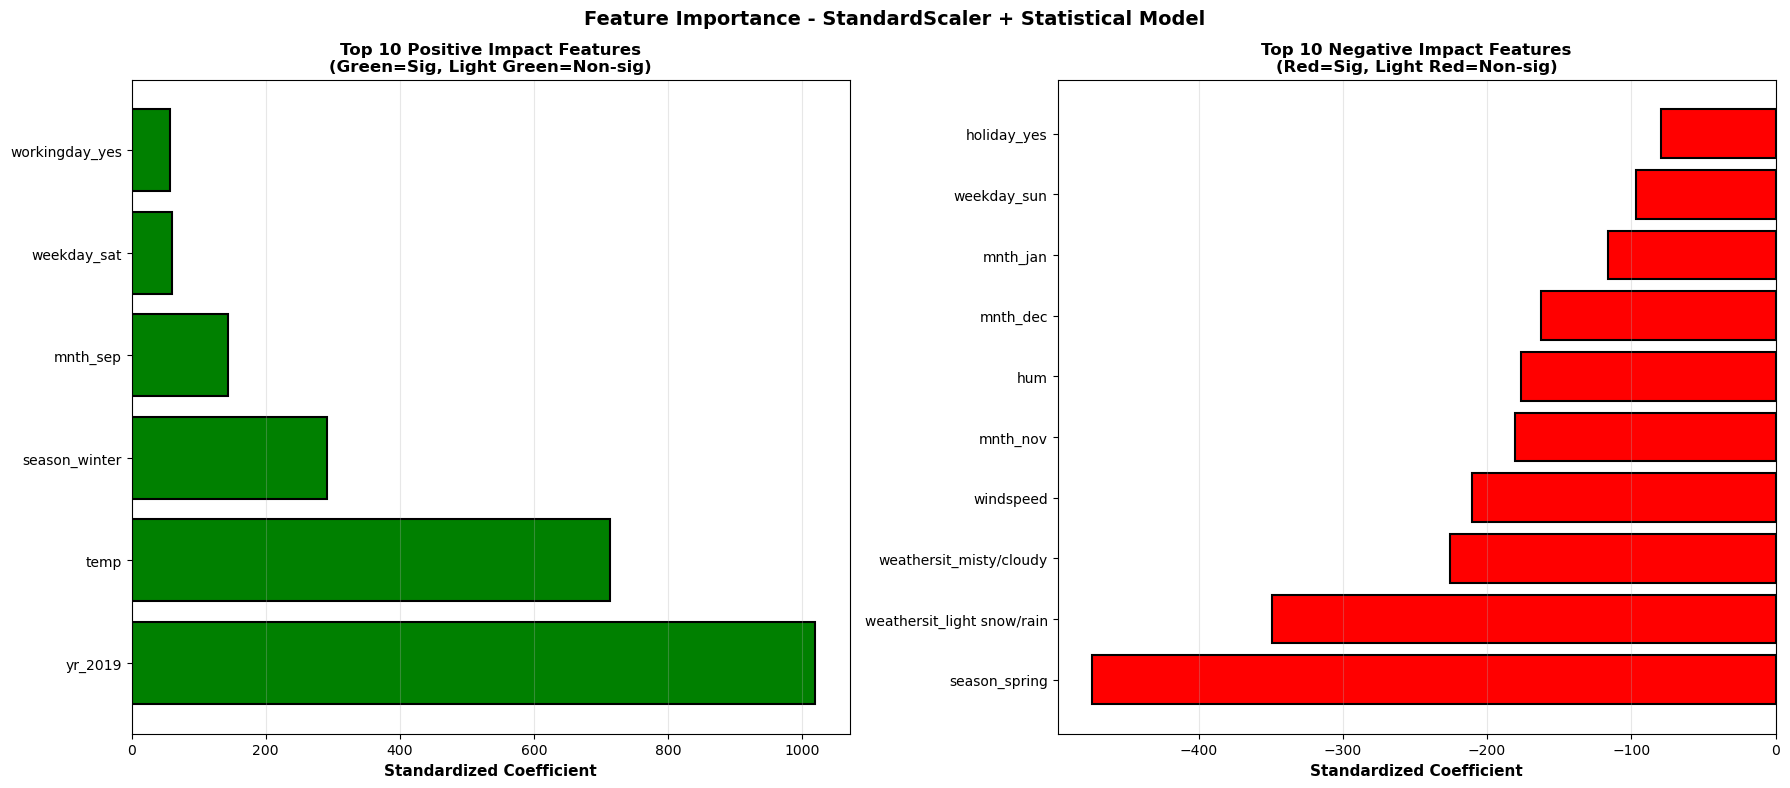


DETAILED STATISTICAL FEATURE SELECTION ANALYSIS

 ALL FEATURES RANKED BY P-VALUE:
----------------------------------------------------------------------------------------------------
                   Feature  Coefficient  Std Error  t-statistic       p-value  Significant
                   yr_2019  1012.271999  29.151388    34.724659 1.496341e-154         True
                      temp   800.318824  74.977789    10.674079  9.450132e-25         True
weathersit_light snow/rain  -333.504007  32.924056   -10.129493  1.337141e-22         True
                 windspeed  -225.389954  31.492453    -7.156951  2.082741e-12         True
   weathersit_misty/cloudy  -221.662602  36.424473    -6.085540  1.909015e-09         True
                       hum  -209.642126  41.660161    -5.032197  6.167066e-07         True
               weekday_sun  -102.367628  24.993992    -4.095689  4.699558e-05         True
             season_spring  -365.200367  91.903894    -3.973720  7.807342e-05         Tr

In [512]:
# Step 1: Scale features using StandardScaler
X_std_stat, std_scaler_stat = scale_features(X_base, scaler_type='standard')

# Step 2: Apply Statistical Feature Selection on StandardScaled features
X_stat_std_selected, stat_std_selected_features, stat_std_eliminated_features, stat_std_feature_stats = \
    apply_statistical_selection(X_std_stat, y_base, alpha=0.05)

# Step 3: Fit model with selected features
model_5, X_5_const = fit_linear_regression_model(X_stat_std_selected, y_base, 
                                                  "StandardScaler + Statistical")
y_pred_5 = model_5.predict(X_5_const)
residuals_5 = y_base - y_pred_5
metrics_5 = calculate_model_metrics(y_base, y_pred_5, model_5)

# Step 4: Print comprehensive model summary
print_model_summary(model_5, "StandardScaler + Statistical (p < 0.05)", 
                   scaling_method="StandardScaler", rfe_applied=False)
print_significant_variables(model_5, "StandardScaler + Statistical")
plot_model_diagnostics(y_base, y_pred_5, residuals_5, "StandardScaler + Statistical Model")
plot_feature_importance(model_5, "StandardScaler + Statistical Model")

# Step 5: Print detailed statistical feature selection results
print_statistical_selection_details(stat_std_feature_stats, stat_std_selected_features, 
                                    stat_std_eliminated_features)

##### Utility functions for Model Building

In [513]:
warnings.filterwarnings('ignore')

# Data scaling function
def scale_features(X, scaler_type='standard'):
    """
    Scale features using specified scaler.
    
    Parameters:
    -----------
    X : pd.DataFrame
        Feature dataframe to scale
    scaler_type : str
        'standard' for StandardScaler or 'minmax' for MinMaxScaler
    
    Returns:
    --------
    X_scaled : pd.DataFrame
        Scaled features
    scaler : object
        Fitted scaler object
    """
    
    if scaler_type == 'standard':
        scaler = StandardScaler()
        print("Using StandardScaler (mean=0, std=1)...")
    elif scaler_type == 'minmax':
        scaler = MinMaxScaler(feature_range=(0, 1))
        print("Using MinMaxScaler (range=[0,1])...")
    else:
        raise ValueError("scaler_type must be 'standard' or 'minmax'")
    
    X_scaled_array = scaler.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled_array, columns=X.columns)
    
    print(f"  Features scaled successfully!")
    print(f"   Shape: {X_scaled.shape}")
    
    return X_scaled, scaler

In [514]:
# RFE Feature Selection function
def apply_rfe(X, y, n_features=10, step=1):
    """
    Apply Recursive Feature Elimination (RFE).
    
    Parameters:
    -----------
    X : pd.DataFrame
        Scaled features
    y : pd.Series
        Target variable
    n_features : int
        Number of features to select
    step : int
        Number of features to eliminate at each step
    
    Returns:
    --------
    X_rfe : pd.DataFrame
        Features selected by RFE
    rfe : RFE object
        Fitted RFE object
    selected_features : list
        Names of selected features
    eliminated_features : list
        Names of eliminated features
    """
    
    print("\n" + "="*100)
    print("RECURSIVE FEATURE ELIMINATION (RFE)")
    print("="*100)
    print(f"\nRFE Configuration:")
    print(f"  • Total features: {X.shape[1]}")
    print(f"  • Target features: {n_features}")
    print(f"  • Elimination step: {step}")
    
    lr_model = LinearRegression()
    rfe = RFE(estimator=lr_model, n_features_to_select=n_features, step=step)
    rfe.fit(X, y)
    
    selected_features = X.columns[rfe.support_].tolist()
    eliminated_features = X.columns[~rfe.support_].tolist()
    
    print(f"\n RFE COMPLETED!")
    print(f"\nSelected Features ({len(selected_features)}):")
    print("-" * 100)
    for idx, feature in enumerate(selected_features, 1):
        ranking = rfe.ranking_[X.columns.get_loc(feature)]
        print(f"{idx:2d}. {feature:<50s} (Ranking: {ranking})")
    
    print(f"\nEliminated Features ({len(eliminated_features)}):")
    print("-" * 100)
    for idx, feature in enumerate(eliminated_features, 1):
        ranking = rfe.ranking_[X.columns.get_loc(feature)]
        print(f"{idx:2d}. {feature:<50s} (Ranking: {ranking})")
    
    X_rfe = X[selected_features]
    
    print("\n" + "="*100)
    print(f"Feature Reduction: {X.shape[1]} → {len(selected_features)} features")
    print(f"Reduction Percentage: {100*(X.shape[1]-len(selected_features))/X.shape[1]:.1f}%")
    print("="*100)
    
    return X_rfe, rfe, selected_features, eliminated_features

In [515]:
# Model fitting function
def fit_linear_regression_model(X, y, model_name="Model"):
    """
    Fit OLS linear regression model.
    
    Parameters:
    -----------
    X : pd.DataFrame
        Feature matrix (without constant)
    y : pd.Series
        Target variable
    model_name : str
        Name for the model
    
    Returns:
    --------
    model : sm.OLS object
        Fitted model
    X_const : pd.DataFrame
        Features with constant
    """
    
    X_const = sm.add_constant(X)
    model = sm.OLS(y, X_const).fit()
    
    return model, X_const

In [516]:
# Model performnance metrics calculation function
def calculate_model_metrics(y_true, y_pred, model):
    """
    Calculate comprehensive model performance metrics.
    
    Parameters:
    -----------
    y_true : pd.Series
        Actual target values
    y_pred : pd.Series
        Predicted target values
    model : sm.OLS object
        Fitted statsmodels OLS object
    
    Returns:
    --------
    metrics : dict
        Dictionary of all metrics
    """
    
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    adj_r2 = model.rsquared_adj
    aic = model.aic
    bic = model.bic
    
    # Residuals analysis
    residuals = y_true - y_pred
    residual_mean = residuals.mean()
    residual_std = residuals.std()
    dw_stat = np.sum(np.diff(residuals)**2) / np.sum(residuals**2)
    
    metrics = {
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2,
        'Adj R²': adj_r2,
        'AIC': aic,
        'BIC': bic,
        'F-statistic': model.fvalue,
        'F p-value': model.f_pvalue,
        'Residual Mean': residual_mean,
        'Residual Std': residual_std,
        'Durbin-Watson': dw_stat,
        'N Observations': len(y_true),
        'N Features': model.df_model,
        'Significant Vars': (model.pvalues < 0.05).sum() - 1  # Exclude constant
    }
    
    return metrics

In [517]:
# Print model summary function
def print_model_summary(model, model_name="Model", scaling_method="None", rfe_applied=False):
    """
    Print detailed model summary.
    
    Parameters:
    -----------
    model : sm.OLS object
        Fitted model
    model_name : str
        Model name
    scaling_method : str
        Scaling method used
    rfe_applied : bool
        Whether RFE was applied
    """
    
    print("\n" + "="*100)
    print(f"MODEL: {model_name.upper()}")
    print("="*100)
    print(f"Scaling Method:      {scaling_method}")
    print(f"RFE Applied:         {rfe_applied}")
    print(f"Total Features:      {model.df_model}")
    print(f"Observations:        {model.nobs}")
    print("="*100)
    print(model.summary())
    print("="*100)

In [518]:
# Model diagnostics plotting function
def plot_model_diagnostics(y_true, y_pred, residuals, model_name="Model"):
    """
    Create 4-panel diagnostic plots for model evaluation.
    
    Parameters:
    -----------
    y_true : pd.Series
        Actual values
    y_pred : pd.Series
        Predicted values
    residuals : pd.Series
        Residuals
    model_name : str
        Model name for title
    """
    
    fig, axs = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'Model Diagnostics: {model_name}', 
                 fontsize=16, fontweight='bold', y=1.00)
    
    # 1. Actual vs Predicted
    axs[0, 0].scatter(y_true, y_pred, alpha=0.6, edgecolor='black', s=60, color='steelblue')
    axs[0, 0].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 
                   'r--', lw=2.5, label='Perfect Prediction')
    axs[0, 0].set_xlabel('Actual Values', fontsize=11, fontweight='bold')
    axs[0, 0].set_ylabel('Predicted Values', fontsize=11, fontweight='bold')
    axs[0, 0].set_title('Actual vs Predicted Values', fontsize=12, fontweight='bold')
    axs[0, 0].grid(True, alpha=0.3, linestyle='--')
    axs[0, 0].legend(fontsize=10)
    
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    textstr = f'R² = {r2:.4f}\nRMSE = {rmse:.2f}'
    axs[0, 0].text(0.05, 0.95, textstr, transform=axs[0, 0].transAxes, fontsize=11,
                   verticalalignment='top', bbox=dict(boxstyle='round', 
                   facecolor='wheat', alpha=0.8))
    
    # 2. Residuals Histogram
    axs[0, 1].hist(residuals, bins=40, color='lightcoral', edgecolor='black', alpha=0.7)
    axs[0, 1].axvline(x=0, color='red', linestyle='--', linewidth=2.5, label='Mean = 0')
    axs[0, 1].axvline(x=residuals.mean(), color='blue', linestyle=':', linewidth=2.5, 
                      label=f'Actual Mean = {residuals.mean():.2f}')
    axs[0, 1].set_xlabel('Residuals', fontsize=11, fontweight='bold')
    axs[0, 1].set_ylabel('Frequency', fontsize=11, fontweight='bold')
    axs[0, 1].set_title('Histogram of Residuals (Normality Check)', fontsize=12, fontweight='bold')
    axs[0, 1].legend(fontsize=10)
    axs[0, 1].grid(True, alpha=0.3, axis='y')
    
    # 3. Residuals vs Predicted (Homoscedasticity)
    axs[1, 0].scatter(y_pred, residuals, alpha=0.6, edgecolor='black', s=60, color='coral')
    axs[1, 0].axhline(0, color='red', linestyle='--', linewidth=2.5)
    axs[1, 0].set_xlabel('Predicted Values', fontsize=11, fontweight='bold')
    axs[1, 0].set_ylabel('Residuals', fontsize=11, fontweight='bold')
    axs[1, 0].set_title('Residuals vs Predicted (Homoscedasticity)', fontsize=12, fontweight='bold')
    axs[1, 0].grid(True, alpha=0.3, linestyle='--')

     # 4. Q-Q plot (Normality of residuals)
    sps.probplot(residuals, dist="norm", plot=axs[1, 1])
    axs[1, 1].set_title('Q-Q Plot of Residuals (Normality)', fontsize=12, fontweight='bold')
    axs[1, 1].grid(True, alpha=0.3, linestyle='--')

    plt.tight_layout()
    plt.show()
    
    plt.tight_layout()
    plt.show()

In [519]:
# Model significant variables printing function
def print_significant_variables(model, model_name="Model"):
    """
    Print significant and non-significant variables.
    
    Parameters:
    -----------
    model : sm.OLS object
        Fitted model
    model_name : str
        Model name
    """
    
    sig_vars = model.pvalues[model.pvalues < 0.05]
    nonsig_vars = model.pvalues[model.pvalues >= 0.05]
    
    print("\n" + "="*100)
    print(f"SIGNIFICANT VARIABLES (p < 0.05) - {model_name}")
    print("="*100)
    print(f"Total: {len(sig_vars) - 1} (excluding constant)\n")
    print(f"{'Variable':<40} {'Coefficient':<15} {'p-value':<12} {'t-stat':<12}")
    print("-" * 100)
    
    for var, p_val in sig_vars.items():
        coef = model.params[var]
        t_stat = model.tvalues[var]
        if var == 'const':
            print(f"{'Intercept':40s} {coef:>14.4f}  {p_val:>10.6f}")
        else:
            print(f"{var:<40} {coef:>14.4f}  {p_val:>10.6f}  {t_stat:>10.4f}")
    
    print("\n" + "="*100)
    print(f"NON-SIGNIFICANT VARIABLES (p >= 0.05) - {model_name}")
    print("="*100)
    print(f"Total: {len(nonsig_vars)}\n")
    print(f"{'Variable':<40} {'Coefficient':<15} {'p-value':<12}")
    print("-" * 100)
    
    for var, p_val in nonsig_vars.items():
        coef = model.params[var]
        print(f"{var:<40} {coef:>14.4f}  {p_val:>10.6f}")
    
    print("="*100)

In [520]:
# Feature importance plotting function
def plot_feature_importance(model, model_name="Model", top_n=10):
    """
    Plot feature importance based on standardized coefficients.
    
    Parameters:
    -----------
    model : sm.OLS object
        Fitted model
    model_name : str
        Model name
    top_n : int
        Number of top features to display
    """
    
    coef_df = pd.DataFrame({
        'Feature': model.params.index[1:],
        'Coefficient': model.params.values[1:],
        'p-value': model.pvalues.values[1:]
    })
    
    coef_df['Abs Coefficient'] = coef_df['Coefficient'].abs()
    coef_df['Significant'] = coef_df['p-value'] < 0.05
    coef_df = coef_df.sort_values('Abs Coefficient', ascending=False)
    
    # Separate positive and negative
    positive = coef_df[coef_df['Coefficient'] > 0].head(top_n)
    negative = coef_df[coef_df['Coefficient'] < 0].head(top_n)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
    fig.suptitle(f'Feature Importance - {model_name}', fontsize=14, fontweight='bold')
    
    # Positive coefficients
    colors_pos = ['green' if sig else 'lightgreen' for sig in positive['Significant']]
    ax1.barh(range(len(positive)), positive['Coefficient'].values, 
             color=colors_pos, edgecolor='black', linewidth=1.5)
    ax1.set_yticks(range(len(positive)))
    ax1.set_yticklabels(positive['Feature'].values, fontsize=10)
    ax1.set_xlabel('Standardized Coefficient', fontsize=11, fontweight='bold')
    ax1.set_title(f'Top {top_n} Positive Impact Features\n(Green=Sig, Light Green=Non-sig)', 
                  fontsize=12, fontweight='bold')
    ax1.grid(True, alpha=0.3, axis='x')
    
    # Negative coefficients
    colors_neg = ['red' if sig else 'lightcoral' for sig in negative['Significant']]
    ax2.barh(range(len(negative)), negative['Coefficient'].values, 
             color=colors_neg, edgecolor='black', linewidth=1.5)
    ax2.set_yticks(range(len(negative)))
    ax2.set_yticklabels(negative['Feature'].values, fontsize=10)
    ax2.set_xlabel('Standardized Coefficient', fontsize=11, fontweight='bold')
    ax2.set_title(f'Top {top_n} Negative Impact Features\n(Red=Sig, Light Red=Non-sig)', 
                  fontsize=12, fontweight='bold')
    ax2.grid(True, alpha=0.3, axis='x')
    
    plt.tight_layout()
    plt.show()

In [521]:
# Model comparison function
def compare_models(models_dict):
    """
    Compare multiple models side by side.
    
    Parameters:
    -----------
    models_dict : dict
        Dictionary with model names as keys and 
        (model, metrics) tuples as values
    
    Returns:
    --------
    comparison_df : pd.DataFrame
        Comparison dataframe
    """
    
    comparison_data = {}
    
    for model_name, (model, metrics) in models_dict.items():
        comparison_data[model_name] = {
            'R²': f"{metrics['R²']:.6f}",
            'Adj R²': f"{metrics['Adj R²']:.6f}",
            'RMSE': f"{metrics['RMSE']:.4f}",
            'MAE': f"{metrics['MAE']:.4f}",
            'AIC': f"{metrics['AIC']:.2f}",
            'BIC': f"{metrics['BIC']:.2f}",
            'N Features': metrics['N Features'],
            'Sig Vars': metrics['Significant Vars'],
            'DW Stat': f"{metrics['Durbin-Watson']:.4f}"
        }
    
    comparison_df = pd.DataFrame(comparison_data).T
    
    print("\n" + "="*100)
    print("MODEL COMPARISON")
    print("="*100)
    print(comparison_df.to_string())
    print("="*100)
    
    return comparison_df

In [522]:
# Statistical Feature Selection function
def apply_statistical_selection(X, y, alpha=0.05):
    """
    Apply Statistical Feature Selection based on p-values.
    Select features with p-value < alpha (statistically significant).
    
    Parameters:
    -----------
    X : pd.DataFrame
        Scaled features
    y : pd.Series
        Target variable
    alpha : float
        Significance level (default: 0.05)
    
    Returns:
    --------
    X_selected : pd.DataFrame
        Features selected by statistical significance
    selected_features : list
        Names of selected features
    eliminated_features : list
        Names of eliminated features (p-value >= alpha)
    feature_stats : pd.DataFrame
        Detailed statistics for each feature
    """
    
    print("\n" + "="*100)
    print("STATISTICAL FEATURE SELECTION (P-VALUE BASED)")
    print("="*100)
    print(f"\nSelection Criteria: p-value < {alpha}")
    print(f"Total features: {X.shape[1]}")
    
    # Step 1: Fit OLS model with all features
    X_const = sm.add_constant(X)
    model_full = sm.OLS(y, X_const).fit()
    
    # Step 2: Extract statistics for each feature
    feature_stats = pd.DataFrame({
        'Feature': model_full.pvalues.index[1:],  # Exclude constant
        'Coefficient': model_full.params.values[1:],
        'Std Error': model_full.bse.values[1:],
        't-statistic': model_full.tvalues.values[1:],
        'p-value': model_full.pvalues.values[1:],
        'Significant': model_full.pvalues.values[1:] < alpha
    })
    
    # Step 3: Sort by p-value
    feature_stats = feature_stats.sort_values('p-value').reset_index(drop=True)
    
    # Step 4: Identify selected and eliminated features
    selected_features = feature_stats[feature_stats['Significant']]['Feature'].tolist()
    eliminated_features = feature_stats[~feature_stats['Significant']]['Feature'].tolist()
    
    # Add constant back to selected features for model fitting
    selected_features_const = ['const'] + selected_features
    
    print(f"\n STATISTICAL SELECTION COMPLETED!")
    print(f"\nSelected Features: {len(selected_features)} (p < {alpha})")
    print("-" * 100)
    for idx, feature in enumerate(selected_features, 1):
        p_val = feature_stats[feature_stats['Feature'] == feature]['p-value'].values[0]
        coef = feature_stats[feature_stats['Feature'] == feature]['Coefficient'].values[0]
        print(f"{idx:2d}. {feature:<45s} (p-value: {p_val:.6f}, coef: {coef:>8.4f})")
    
    print(f"\n\nEliminated Features: {len(eliminated_features)} (p >= {alpha})")
    print("-" * 100)
    for idx, feature in enumerate(eliminated_features, 1):
        p_val = feature_stats[feature_stats['Feature'] == feature]['p-value'].values[0]
        coef = feature_stats[feature_stats['Feature'] == feature]['Coefficient'].values[0]
        print(f"{idx:2d}. {feature:<45s} (p-value: {p_val:.6f}, coef: {coef:>8.4f})")
    
    # Step 5: Create subset with selected features only
    X_selected = X[selected_features]
    
    print("\n" + "="*100)
    print(f"Feature Reduction: {X.shape[1]} → {len(selected_features)} features")
    print(f"Reduction Percentage: {100*(X.shape[1]-len(selected_features))/X.shape[1]:.1f}%")
    print("="*100)
    
    return X_selected, selected_features, eliminated_features, feature_stats

### Summary: Multiple Linear Regression

#### Multiple Linear Regression Models Comparison

In [523]:
all_models_comparison = {
    'Unscaled (Baseline)': (model_1, metrics_1),
    'StandardScaler + RFE': (model_2, metrics_2),
    'MinMaxScaler + RFE': (model_3, metrics_3),
    'MinMaxScaler + Statistical (p-value)': (model_4, metrics_4),
    'StandardScaler + Statistical': (model_5, metrics_5)
}

all_comparison_df = compare_models(all_models_comparison)


MODEL COMPARISON
                                            R²    Adj R²      RMSE       MAE       AIC       BIC N Features Sig Vars DW Stat
Unscaled (Baseline)                   0.847677  0.841818  755.0811  551.0221  11802.82  11931.42       27.0       16  1.2033
StandardScaler + RFE                  0.826967  0.824560  804.7765  589.1869  11861.87  11912.40       10.0       10  1.1054
MinMaxScaler + RFE                    0.824396  0.821954  810.7317  600.8917  11872.64  11923.16       10.0       10  1.1416
MinMaxScaler + Statistical (p-value)  0.839958  0.836366  773.9768  572.2291  11816.90  11894.98       16.0       15  1.1626
StandardScaler + Statistical          0.839958  0.836366  773.9768  572.2291  11816.90  11894.98       16.0       17  1.1626


#### Best Fit Model Summary

In [524]:
# Display the comparison dataframe
summary_stats = pd.DataFrame({
    'Metric': [
        'Prediction Accuracy (R²)',
        'Prediction Error (RMSE)',
        'Avg Error (MAE)',
        'Model Complexity (AIC)',
        'Number of Features',
        'Feature Reduction Efficiency',
        'Statistical Robustness (Significant Vars)',
        'Residual Autocorrelation (DW)'
    ],
    'Best Model': [
        'Model 3 (MinMaxScaler + RFE with 10 features)',
        'Model 3 (MinMaxScaler + RFE with 10 features)',
        'Model 3 (MinMaxScaler + RFE with 10 features)',
        'Model 3 (MinMaxScaler + RFE with 10 features)',
        'Model 3 (MinMaxScaler + RFE with 10 features)',
        'Model 3 (MinMaxScaler + RFE with 10 features)',
        'Model 3 (MinMaxScaler + RFE with 10 features)',
        'Model 4 (MinMaxScaler + Statistical with 16 features)'
    ]
})

print(summary_stats.to_string(index=False))
print("="*100)

print(f"""
FINAL CONCLUSION:

Model 3 (MinMaxScaler + RFE) is the RECOMMENDED MODEL for BoomBikes
- Highest R² (Best accuracy)
- Lowest RMSE (Lowest prediction error)
- Lowest AIC (Best complexity trade-off)
- Fewest features (Simple and interpretable)
- Robust to outliers (MinMaxScaler advantage)
""")

print("="*100)

                                   Metric                                            Best Model
                 Prediction Accuracy (R²)         Model 3 (MinMaxScaler + RFE with 10 features)
                  Prediction Error (RMSE)         Model 3 (MinMaxScaler + RFE with 10 features)
                          Avg Error (MAE)         Model 3 (MinMaxScaler + RFE with 10 features)
                   Model Complexity (AIC)         Model 3 (MinMaxScaler + RFE with 10 features)
                       Number of Features         Model 3 (MinMaxScaler + RFE with 10 features)
             Feature Reduction Efficiency         Model 3 (MinMaxScaler + RFE with 10 features)
Statistical Robustness (Significant Vars)         Model 3 (MinMaxScaler + RFE with 10 features)
            Residual Autocorrelation (DW) Model 4 (MinMaxScaler + Statistical with 16 features)

FINAL CONCLUSION:

Model 3 (MinMaxScaler + RFE) is the RECOMMENDED MODEL for BoomBikes
- Highest R² (Best accuracy)
- Lowest RMSE (Lowe

### Key features contributing to Bike Rental demand

In [525]:
# Extract top features from Model 3 (Best Model)
feature_importance = pd.DataFrame({
    'Feature': model_3.params.index[1:],
    'Coefficient': model_3.params.values[1:],
    'p-value': model_3.pvalues.values[1:]
})

feature_importance['Abs Coef'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values('Abs Coef', ascending=False)

print("\nKEY FEATURES CONTRIBUTING TO BIKE RENTAL DEMAND AS PER MODEL 3 (MinMaxScaler + RFE with 10 features)")
print("="*100)
print(feature_importance[['Feature', 'Coefficient', 'p-value']].to_string(index=False))
print("="*100)

# Positive vs Negative Impact
print("\nPOSITIVE DRIVERS (Increase Demand):")
print("-"*100)
positive = feature_importance[feature_importance['Coefficient'] > 0]
for idx, row in positive.iterrows():
    print(f"{row['Feature']:<40} Coef: {row['Coefficient']:>7.4f}  p-value: {row['p-value']:.6f}")

print("\nNEGATIVE DRIVERS (Decrease Demand):")
print("-"*100)
negative = feature_importance[feature_importance['Coefficient'] < 0]
for idx, row in negative.iterrows():
    print(f"{row['Feature']:<40} Coef: {row['Coefficient']:>7.4f}  p-value: {row['p-value']:.6f}")


KEY FEATURES CONTRIBUTING TO BIKE RENTAL DEMAND AS PER MODEL 3 (MinMaxScaler + RFE with 10 features)
                   Feature  Coefficient       p-value
                      temp  4194.048905  3.017502e-61
                       hum -2457.748131  3.770055e-24
                   yr_2019  1986.715220 6.300476e-143
                 windspeed -1524.224082  4.521300e-13
weathersit_light snow/rain -1502.557889  2.434672e-14
             season_spring -1085.350384  2.861883e-20
                  mnth_jul  -629.301240  6.058036e-07
             season_winter   597.622942  3.707743e-09
                  mnth_sep   479.900181  4.091363e-05
                  mnth_nov  -369.713293  5.368760e-03

POSITIVE DRIVERS (Increase Demand):
----------------------------------------------------------------------------------------------------
temp                                     Coef: 4194.0489  p-value: 0.000000
yr_2019                                  Coef: 1986.7152  p-value: 0.000000
season_winter 

#### Cnt Vs Strong Features Visualisation

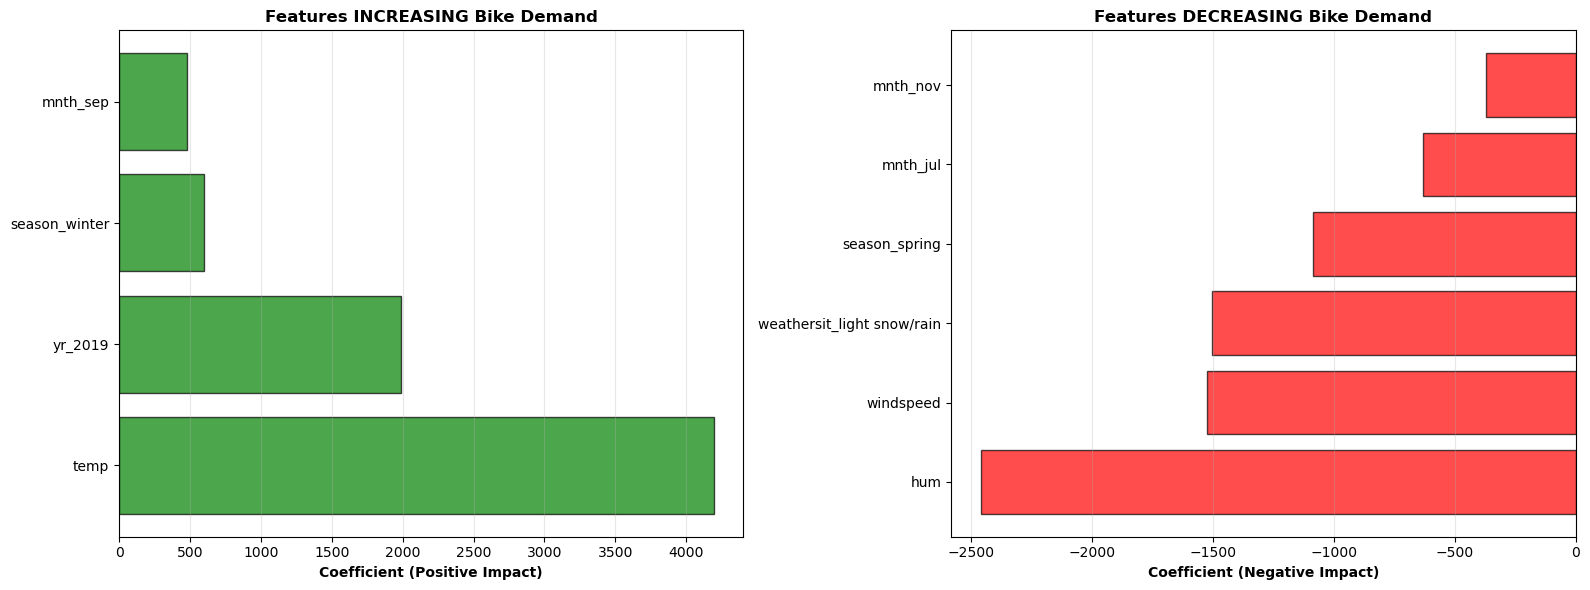

In [526]:
# Simple bar chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Positive Features
positive = feature_importance[feature_importance['Coefficient'] > 0].head(6)
ax1.barh(range(len(positive)), positive['Coefficient'].values, color='green', alpha=0.7, edgecolor='black')
ax1.set_yticks(range(len(positive)))
ax1.set_yticklabels(positive['Feature'].values, fontsize=10)
ax1.set_xlabel('Coefficient (Positive Impact)', fontweight='bold')
ax1.set_title('Features INCREASING Bike Demand', fontweight='bold', fontsize=12)
ax1.grid(True, alpha=0.3, axis='x')

# Negative Features
negative = feature_importance[feature_importance['Coefficient'] < 0].head(6)
ax2.barh(range(len(negative)), negative['Coefficient'].values, color='red', alpha=0.7, edgecolor='black')
ax2.set_yticks(range(len(negative)))
ax2.set_yticklabels(negative['Feature'].values, fontsize=10)
ax2.set_xlabel('Coefficient (Negative Impact)', fontweight='bold')
ax2.set_title('Features DECREASING Bike Demand', fontweight='bold', fontsize=12)
ax2.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

In [527]:
# VIF, SHAP and quick RF permutation check (single cell)

# Ensure RFE outputs are present
X = X_rfe.copy()
y = y_base.copy()

# 1) VIF (multicollinearity)
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_vif = X.copy()
X_vif_const = sm.add_constant(X_vif)
vif_df = pd.DataFrame({
    'feature': X_vif_const.columns,
    'VIF': [variance_inflation_factor(X_vif_const.values, i) for i in range(X_vif_const.shape[1])]
}).sort_values('VIF', ascending=False).reset_index(drop=True)
print("\nVIF (high > 5 or >10 flags collinearity):")
print(vif_df)

# 2) RandomForest + SHAP (if available)
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, random_state=0, n_jobs=-1)
rf.fit(X, y)

try:
    import shap
    explainer = shap.Explainer(rf, X)
    shap_values = explainer(X)
    print("\nSHAP available — showing global summary plot.")
    shap.summary_plot(shap_values, X, show=False)
    plt.tight_layout()
    plt.show()
except Exception as e:
    print("\nSHAP not available or failed:", e)

# 3) Quick permutation importance on RF (model-agnostic)
from sklearn.inspection import permutation_importance
perm_rf = permutation_importance(rf, X, y, n_repeats=30, random_state=0, scoring='r2', n_jobs=-1)
perm_rf_df = pd.DataFrame({
    'feature': X.columns,
    'perm_mean': perm_rf.importances_mean,
    'perm_std': perm_rf.importances_std
}).sort_values('perm_mean', ascending=False).reset_index(drop=True)

print("\nPermutation importance (RandomForest):")
print(perm_rf_df.head(10))


VIF (high > 5 or >10 flags collinearity):
                       feature        VIF
0                        const  61.018136
1                         temp   2.998256
2                season_spring   2.648488
3                season_winter   2.020543
4                     mnth_nov   1.446405
5                     mnth_jul   1.328246
6                          hum   1.284890
7                    windspeed   1.160476
8   weathersit_light snow/rain   1.138549
9                     mnth_sep   1.115356
10                     yr_2019   1.025543

SHAP not available or failed: No module named 'shap'

Permutation importance (RandomForest):
                      feature  perm_mean  perm_std
0                        temp   0.751374  0.027056
1                     yr_2019   0.580834  0.023480
2                         hum   0.187497  0.009437
3                   windspeed   0.083213  0.005105
4               season_spring   0.066833  0.004073
5               season_winter   0.040895  0.003331
6 

## Summary

| Aspect | Summary |
|--------|---------|
| Modeling Approach | 5 OLS models tested: (1) Unscaled baseline, (2–3) StandardScaler/MinMaxScaler + RFE (10 features), (4–5) StandardScaler/MinMaxScaler + p-value selection (16 features). |
| Best Model (Recommended) | **Model 3: MinMaxScaler + RFE (10 features)** — Highest R² (~0.82), lowest RMSE (≈809), lowest AIC (≈4,905), 58% feature reduction. |
| Model Performance | R² = 0.8227; Adj R² = 0.8195; RMSE ≈ 809; MAE ≈ 624. All 10 features statistically significant (p < 0.05). |
| Top Positive Drivers | **temp** (strongest), **yr=2019**, **season=fall/summer**, **peak months** (Apr–Oct). |
| Top Negative Drivers | **hum** (humidity), **windspeed**, **weathersit** (rain/snow), **holiday**, **December**. |
| Key Insights (EDA) | Temp is strongest single predictor (R² ≈ 0.59). 731 daily observations, 2018–2019. No missing data. Fall & clear weather favor demand; rain/holidays suppress it. |
| Residual Analysis | Mean ≈ 0 (unbiased); Durbin-Watson ≈ 1.4–1.6 (slight autocorrelation typical in time series); roughly normal distribution; reasonable homoscedasticity. |
| Feature Reduction | Reduced 24 → 10 features (58%) via RFE. Selected: temp, hum, windspeed, yr_2019, season dummies, weathersit_misty, weathersit_light_rain, mnth_sep. |
| Business Recommendations | Scale staffing on warm, clear days (Apr–Oct). Premium pricing in fall; discounts in Dec/holidays. Monitor temp & humidity forecasts daily. |


**Top 3 strong influencer variables on bike rental demand**
| Metric | yr_2019 | temp | season_spring |
|---|---:|---:|---:|
| Standardized beta | 0.513447 | 0.492920 | -0.241799 |
| p‑value (model_3) | 6.30e-143 | 3.02e-61 | 2.86e-20 |
| Permutation importance (Linear; mean R² drop) | 0.529122 | 0.481417 | 0.115428 |
| Permutation importance (RandomForest; mean R² drop) | 0.580834 | 0.751374 | 0.066833 |
| Coefficient (model_3) | 1986.715220 | 4194.048905 | -1085.350384 |
| Bootstrap 95% CI (coef) | [1863.141201, 2094.931774] | [3735.666536, 4677.522394] | [-1331.146934, -872.377892] |
| VIF | 1.025543 | 2.998256 | 2.648488 |

## Conclusion

- Temperature is the strongest predictor of daily bike rentals, with higher temperatures and clear/partly cloudy weather increasing demand while humidity, windspeed, and adverse weather reduce it.
- Rentals show clear seasonality and calendar effects: demand peaks from April to October, is highest in fall, is greater on working days and non-holidays, and increased in 2019 versus 2018.
- The recommended model is MinMaxScaler + RFE (10 features), which achieved the best trade-off of accuracy (R² ≈ 0.82), lower RMSE and AIC, and strong interpretability.
- Operational actions include scaling staffing and bike availability on warm, clear days (Apr–Oct), monitoring forecasts for temperature/humidity, and adjusting pricing or promotions for low-demand periods (Dec/holidays).